# Summary

Summary of the data collecting and pulling process:

Through scouring Google Dataset Search and Kaggle, Airbnb datasets were pulled featuring, ostensibly, main attributes affecting price. Primary features included within the central dataset are: price, room type, shared room(?), private room(?), person capacity, superhost(?), multi room(?), for business(?), cleanliness rating, guest satisfaction rating, bedroom number, distance from city center, distance from metro, longitude, and latitude. 

Furthermore, because the primary Airbnb dataset is sourced from various European cities, locating supplementary socio-economic and socio-cultural variables for each respective Euroean city to append as additional features was attempted. However, sourcing additional relevant indicators, proved difficult, but simple datasets were extracted from Wikipedia and Kaggle. These supplemental features are city gdp, metropolitan population, city's area (in km2), and these factors eventually were affixed as additional columns within the primary Airbnb dataset. 

Because all thirteen datasets were pulled from Kaggle or Wikipedia, there was minimal need for cleaning null values or duplicates. The Wikipedia table was converted into .csv via the website, https://wikitable2csv.ggor.de/. Joining, concatenating, and merging the tables all datasets into one coherent table became the most onerous process. For the ten European city datasets, new weekday vs. weekend columns for the respective city_weekend and city_weekday tables were created to permanently label these datasets for subsequent merges. After concatenating each city's weekend and weekday datasets together into one coherent city dataset, the ten cities' were merged into one unified European dataset. After this stage - where all ten European cities are now aggregated into one centralized table - two new csvs containing each cities's gdp, population, area were appended onto their respective cities. This layer will hopefully permit a slightly more robust analysis of Airbnb factors that determine price, not merely via Airbnb room characteristics, but also through external socio-cultural or economic conditions influencing consumer psychology throughout these European cities. 

Note: More granular technical details of the data wrangling process are included below. 





In [144]:
import numpy as np
import seaborn as sns

In [4]:
import pandas as pd

In [5]:
#Import all the datasets

amsterdam_weekdays = pd.read_csv('amsterdam_weekdays.csv')
amsterdam_weekends = pd.read_csv('amsterdam_weekends.csv')
athens_weekdays = pd.read_csv('athens_weekdays.csv')
athens_weekends = pd.read_csv('athens_weekends.csv')
barcelona_weekdays = pd.read_csv('barcelona_weekdays.csv')
barcelona_weekends = pd.read_csv('barcelona_weekends.csv')
berlin_weekdays = pd.read_csv('berlin_weekdays.csv')
berlin_weekends = pd.read_csv('berlin_weekends.csv')
budapest_weekdays = pd.read_csv('budapest_weekdays.csv')
budapest_weekends = pd.read_csv('budapest_weekends.csv')
lisbon_weekdays = pd.read_csv('lisbon_weekdays.csv')
lisbon_weekends = pd.read_csv('lisbon_weekends.csv')
london_weekdays = pd.read_csv('london_weekdays.csv')
london_weekends = pd.read_csv('london_weekends.csv')
paris_weekdays = pd.read_csv('paris_weekdays.csv')
paris_weekends = pd.read_csv('paris_weekends.csv')
rome_weekdays = pd.read_csv('rome_weekdays.csv')
rome_weekends = pd.read_csv('rome_weekends.csv')
vienna_weekdays = pd.read_csv('vienna_weekdays.csv')
vienna_weekends = pd.read_csv('vienna_weekends.csv')

In [6]:
#Print all the dataset's dimensions
print('amsterdam_weekdays shape = ' + str(amsterdam_weekdays.shape))
print('amsterdam_weekends shape = ' + str(amsterdam_weekends.shape))
print('athens_weekdays shape = ' + str(athens_weekdays.shape))
print('athens_weekends shape = ' + str(athens_weekends.shape))
print('barcelona_weekdays shape = ' + str(barcelona_weekdays.shape))
print('barcelona_weekends shape = ' + str(barcelona_weekends.shape))
print('berlin_weekdays shape = ' + str(berlin_weekdays.shape))
print('berlin_weekends shape = ' + str(berlin_weekends.shape))
print('budapest_weekdays shape = ' + str(budapest_weekdays.shape))
print('budapest_weekends shape = ' + str(budapest_weekends.shape))
print('lisbon_weekdays shape = ' + str(lisbon_weekdays.shape))
print('lisbon_weekends shape = ' + str(lisbon_weekends.shape))
print('london_weekdays shape = ' + str(london_weekdays.shape))
print('london_weekends shape = ' + str(london_weekends.shape))
print('paris_weekdays shape = ' + str(paris_weekdays.shape))
print('paris_weekends shape = ' + str(paris_weekends.shape))
print('rome_weekdays shape = ' + str(rome_weekdays.shape))
print('rome_weekends shape = ' + str(rome_weekends.shape))
print('vienna_weekdays shape = ' + str(vienna_weekdays.shape))
print('vienna_weekends shape = ' + str(vienna_weekends.shape))

amsterdam_weekdays shape = (1103, 20)
amsterdam_weekends shape = (977, 20)
athens_weekdays shape = (2653, 20)
athens_weekends shape = (2627, 20)
barcelona_weekdays shape = (1555, 20)
barcelona_weekends shape = (1278, 20)
berlin_weekdays shape = (1284, 20)
berlin_weekends shape = (1200, 20)
budapest_weekdays shape = (2074, 20)
budapest_weekends shape = (1948, 20)
lisbon_weekdays shape = (2857, 20)
lisbon_weekends shape = (2906, 20)
london_weekdays shape = (4614, 20)
london_weekends shape = (5379, 20)
paris_weekdays shape = (3130, 20)
paris_weekends shape = (3558, 20)
rome_weekdays shape = (4492, 20)
rome_weekends shape = (4535, 20)
vienna_weekdays shape = (1738, 20)
vienna_weekends shape = (1799, 20)


In [7]:
#Examine all the columns for each city's dataset
print(amsterdam_weekdays.columns)
print(amsterdam_weekends.columns)
print(athens_weekdays.columns)
print(athens_weekends.columns)
print(barcelona_weekdays.columns)
print(barcelona_weekends.columns)
print(berlin_weekdays.columns)
print(berlin_weekends.columns)
print(budapest_weekdays.columns)
print(budapest_weekends.columns)
print(lisbon_weekdays.columns)
print(lisbon_weekends.columns)
print(london_weekdays.columns)
print(london_weekends.columns)
print(paris_weekdays.columns)
print(paris_weekends.columns)
print(rome_weekdays.columns)
print(rome_weekends.columns)
print(vienna_weekdays.columns)
print(vienna_weekends.columns)

Index(['Unnamed: 0', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat'],
      dtype='object')
Index(['Unnamed: 0', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat'],
      dtype='object')
Index(['Unnamed: 0', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_ind

In [8]:
#Each city's columns has the same features, which allows us to join these files easily with the concatenate function

In [9]:
#However, before concatenating all the city's datasets together, let's examine the dataset features/colunmns more closely
#Let's examine Amsterdam first
amsterdam_weekdays.head()

Unnamed: 0     realSum     room_type  room_shared  room_private  \
0           0  194.033698  Private room        False          True   
1           1  344.245776  Private room        False          True   
2           2  264.101422  Private room        False          True   
3           3  433.529398  Private room        False          True   
4           4  485.552926  Private room        False          True   

   person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
0              2.0              False      1    0                10.0   
1              4.0              False      0    0                 8.0   
2              2.0              False      0    1                 9.0   
3              4.0              False      0    1                 9.0   
4              2.0               True      0    0                10.0   

   guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                        93.0         1  5.022964    2.539380   78.690379   
1                        85.0         1  0.488389    0.239404  631.176378   
2                        87.0         1  5.748312    3.651621   75.275877   
3                        90.0         2  0.384862    0.439876  493.272534   
4                        98.0         1  0.544738    0.318693  552.830324   

   attr_index_norm  rest_index  rest_index_norm      lng       lat  
0         4.166708   98.253896         6.846473  4.90569  52.41772  
1        33.421209  837.280757        58.342928  4.90005  52.37432  
2         3.985908   95.386955         6.646700  4.97512  52.36103  
3        26.119108  875.033098        60.973565  4.89417  52.37663  
4        29.272733  815.305740        56.811677  4.90051  52.37508

In [10]:
#The 'Unnamed: 0' column is redundant, since we can just use the index, so let's remove this column
amstdrop = amsterdam_weekdays.drop(columns=['Unnamed: 0'])
amstdrop.head()

realSum     room_type  room_shared  room_private  person_capacity  \
0  194.033698  Private room        False          True              2.0   
1  344.245776  Private room        False          True              4.0   
2  264.101422  Private room        False          True              2.0   
3  433.529398  Private room        False          True              4.0   
4  485.552926  Private room        False          True              2.0   

   host_is_superhost  multi  biz  cleanliness_rating  \
0              False      1    0                10.0   
1              False      0    0                 8.0   
2              False      0    1                 9.0   
3              False      0    1                 9.0   
4               True      0    0                10.0   

   guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                        93.0         1  5.022964    2.539380   78.690379   
1                        85.0         1  0.488389    0.239404  631.176378   
2                        87.0         1  5.748312    3.651621   75.275877   
3                        90.0         2  0.384862    0.439876  493.272534   
4                        98.0         1  0.544738    0.318693  552.830324   

   attr_index_norm  rest_index  rest_index_norm      lng       lat  
0         4.166708   98.253896         6.846473  4.90569  52.41772  
1        33.421209  837.280757        58.342928  4.90005  52.37432  
2         3.985908   95.386955         6.646700  4.97512  52.36103  
3        26.119108  875.033098        60.973565  4.89417  52.37663  
4        29.272733  815.305740        56.811677  4.90051  52.37508

In [11]:
#Let's also add a new column 'Weekday' to signal that the data in this dataset belongs to the 'weekday' dataset
#This step becomes critical after we eventually concatenate all the datasets together
amstdrop['Weekday/Weekend'] = 'Weekday'
amstdrop.head()

realSum     room_type  room_shared  room_private  person_capacity  \
0  194.033698  Private room        False          True              2.0   
1  344.245776  Private room        False          True              4.0   
2  264.101422  Private room        False          True              2.0   
3  433.529398  Private room        False          True              4.0   
4  485.552926  Private room        False          True              2.0   

   host_is_superhost  multi  biz  cleanliness_rating  \
0              False      1    0                10.0   
1              False      0    0                 8.0   
2              False      0    1                 9.0   
3              False      0    1                 9.0   
4               True      0    0                10.0   

   guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                        93.0         1  5.022964    2.539380   78.690379   
1                        85.0         1  0.488389    0.239404  631.176378   
2                        87.0         1  5.748312    3.651621   75.275877   
3                        90.0         2  0.384862    0.439876  493.272534   
4                        98.0         1  0.544738    0.318693  552.830324   

   attr_index_norm  rest_index  rest_index_norm      lng       lat  \
0         4.166708   98.253896         6.846473  4.90569  52.41772   
1        33.421209  837.280757        58.342928  4.90005  52.37432   
2         3.985908   95.386955         6.646700  4.97512  52.36103   
3        26.119108  875.033098        60.973565  4.89417  52.37663   
4        29.272733  815.305740        56.811677  4.90051  52.37508   

  Weekday/Weekend  
0         Weekday  
1         Weekday  
2         Weekday  
3         Weekday  
4         Weekday

In [12]:
#let's repeat the above modifications also for amsterdam_weekend.csv
amstdrop2 = amsterdam_weekends.drop(columns=['Unnamed: 0'])
amstdrop2['Weekday/Weekend'] = 'Weekend'
amstdrop2.head()

realSum        room_type  room_shared  room_private  person_capacity  \
0   319.640053     Private room        False          True              2.0   
1   347.995219     Private room        False          True              2.0   
2   482.975183     Private room        False          True              4.0   
3   485.552926     Private room        False          True              2.0   
4  2771.541724  Entire home/apt        False         False              4.0   

   host_is_superhost  multi  biz  cleanliness_rating  \
0              False      0    1                 9.0   
1              False      0    1                 9.0   
2              False      0    1                 9.0   
3               True      0    0                10.0   
4               True      0    0                10.0   

   guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                        88.0         1  4.763360    0.852117  110.906123   
1                        87.0         1  5.748310    3.651591   75.275937   
2                        90.0         2  0.384872    0.439852  493.272517   
3                        98.0         1  0.544723    0.318688  552.849514   
4                       100.0         3  1.686798    1.458399  208.809162   

   attr_index_norm  rest_index  rest_index_norm      lng       lat  \
0         5.871971  136.982208        11.941560  4.84639  52.34137   
1         3.985516   95.386468         8.315410  4.97512  52.36103   
2        26.116521  875.114817        76.289005  4.89417  52.37663   
3        29.270850  815.303994        71.074937  4.90051  52.37508   
4        11.055489  272.315202        23.739349  4.88467  52.38749   

  Weekday/Weekend  
0         Weekend  
1         Weekend  
2         Weekend  
3         Weekend  
4         Weekend

In [13]:
#Let's concatenate Amsterdam's weekday csv with its weekend csv
amstconcat = pd.concat([amstdrop, amstdrop2])
amstconcat.head()

realSum     room_type  room_shared  room_private  person_capacity  \
0  194.033698  Private room        False          True              2.0   
1  344.245776  Private room        False          True              4.0   
2  264.101422  Private room        False          True              2.0   
3  433.529398  Private room        False          True              4.0   
4  485.552926  Private room        False          True              2.0   

   host_is_superhost  multi  biz  cleanliness_rating  \
0              False      1    0                10.0   
1              False      0    0                 8.0   
2              False      0    1                 9.0   
3              False      0    1                 9.0   
4               True      0    0                10.0   

   guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                        93.0         1  5.022964    2.539380   78.690379   
1                        85.0         1  0.488389    0.239404  631.176378   
2                        87.0         1  5.748312    3.651621   75.275877   
3                        90.0         2  0.384862    0.439876  493.272534   
4                        98.0         1  0.544738    0.318693  552.830324   

   attr_index_norm  rest_index  rest_index_norm      lng       lat  \
0         4.166708   98.253896         6.846473  4.90569  52.41772   
1        33.421209  837.280757        58.342928  4.90005  52.37432   
2         3.985908   95.386955         6.646700  4.97512  52.36103   
3        26.119108  875.033098        60.973565  4.89417  52.37663   
4        29.272733  815.305740        56.811677  4.90051  52.37508   

  Weekday/Weekend  
0         Weekday  
1         Weekday  
2         Weekday  
3         Weekday  
4         Weekday

In [14]:
#I'm sampling the new merged file to double-check that some records have 'weekday' and 'weekend' respectively to check if this file was merged correctly
amstconcat.sample(10)

realSum        room_type  room_shared  room_private  person_capacity  \
774  195.674080     Private room        False          True              2.0   
394  552.808567  Entire home/apt        False         False              4.0   
735  921.660066  Entire home/apt        False         False              4.0   
685  424.155789     Private room        False          True              2.0   
427  614.440044     Private room        False          True              2.0   
353  329.482342     Private room        False          True              2.0   
52   405.642912     Private room        False          True              4.0   
333  356.197127     Private room        False          True              2.0   
496  721.533522  Entire home/apt        False         False              4.0   
672  362.524313     Private room        False          True              2.0   

     host_is_superhost  multi  biz  cleanliness_rating  \
774              False      0    0                 8.0   
394              False      0    0                 9.0   
735              False      0    0                 8.0   
685              False      1    0                10.0   
427               True      0    0                10.0   
353              False      0    1                 9.0   
52                True      0    0                 9.0   
333              False      0    0                10.0   
496              False      0    0                 9.0   
672               True      1    0                10.0   

     guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
774                        75.0         1  2.845809    1.557674  179.391530   
394                        87.0         2  9.186680    0.698706   50.306469   
735                        90.0         1  0.409940    0.277476  532.148823   
685                        95.0         1  0.334544    0.224671  680.103080   
427                        99.0         1  3.837689    2.813467  109.154255   
353                        97.0         1  0.370008    0.264995  581.330543   
52                         98.0         1  5.036498    1.246611   87.204732   
333                       100.0         1  1.868844    0.839318  202.309201   
496                        96.0         2  3.994829    1.016793  135.634678   
672                        99.0         1  3.754955    1.405144  121.729643   

     attr_index_norm  rest_index  rest_index_norm      lng       lat  \
774         9.497960  221.856370        19.340550  4.85390  52.36437   
394         2.663761   62.948817         4.386364  4.97561  52.30793   
735        28.177634  718.017821        50.032515  4.89659  52.37023   
685        36.011910  751.912711        52.394360  4.89756  52.37197   
427         5.779218  137.284748        11.967935  4.94942  52.37194   
353        30.781838  753.880492        52.531477  4.89735  52.37116   
52          4.617548  109.095810         7.601953  4.82115  52.38375   
333        10.712407  245.239148        17.088617  4.91674  52.38177   
496         7.181946  173.898299        12.117484  4.84900  52.34956   
672         6.445665  159.211745        11.094103  4.93614  52.35214   

    Weekday/Weekend  
774         Weekend  
394         Weekday  
735         Weekday  
685         Weekday  
427         Weekend  
353         Weekday  
52          Weekday  
333         Weekday  
496         Weekday  
672         Weekday

In [15]:
#Let's add a new column to specify that these datapoints belong to Amsterdam
#This steps becomes critical after we eventually concatenate all the city datasets together
amstconcat['City'] = 'Amsterdam'
amstconcat.head()

realSum     room_type  room_shared  room_private  person_capacity  \
0  194.033698  Private room        False          True              2.0   
1  344.245776  Private room        False          True              4.0   
2  264.101422  Private room        False          True              2.0   
3  433.529398  Private room        False          True              4.0   
4  485.552926  Private room        False          True              2.0   

   host_is_superhost  multi  biz  cleanliness_rating  \
0              False      1    0                10.0   
1              False      0    0                 8.0   
2              False      0    1                 9.0   
3              False      0    1                 9.0   
4               True      0    0                10.0   

   guest_satisfaction_overall  ...      dist  metro_dist  attr_index  \
0                        93.0  ...  5.022964    2.539380   78.690379   
1                        85.0  ...  0.488389    0.239404  631.176378   
2                        87.0  ...  5.748312    3.651621   75.275877   
3                        90.0  ...  0.384862    0.439876  493.272534   
4                        98.0  ...  0.544738    0.318693  552.830324   

   attr_index_norm  rest_index  rest_index_norm      lng       lat  \
0         4.166708   98.253896         6.846473  4.90569  52.41772   
1        33.421209  837.280757        58.342928  4.90005  52.37432   
2         3.985908   95.386955         6.646700  4.97512  52.36103   
3        26.119108  875.033098        60.973565  4.89417  52.37663   
4        29.272733  815.305740        56.811677  4.90051  52.37508   

   Weekday/Weekend       City  
0          Weekday  Amsterdam  
1          Weekday  Amsterdam  
2          Weekday  Amsterdam  
3          Weekday  Amsterdam  
4          Weekday  Amsterdam  

[5 rows x 21 columns]

In [16]:
#The above steps finished cleaning and concatenating the two Amsterdam csv's. 
#These steps have to be repeated for each city, which is time-consuming
#To save time, I will create a new function that replicates the above clean/merge tasks and apply this function for each city

def aggregate(csv1,col1,csv2,col2,city):      
    csv1['Weekday/Weekend'] = col1
    csv2['Weekday/Weekend'] = col2
    csv1.drop(columns = ['Unnamed: 0'],inplace=True)
    csv2.drop(columns = ['Unnamed: 0'],inplace=True)
    newconcatfile = pd.concat([csv1, csv2])
    newconcatfile['city'] = city
    return newconcatfile

#This function is a condensed version of all the above cleaning/wrangling tasks.

In [17]:
#Applying the aggregate function for each city (including repeating it for Amsterdam)
amsterdam = aggregate(amsterdam_weekdays,'weekdays',amsterdam_weekends,'weekends','amsterdam')
athens = aggregate(athens_weekdays,'weekdays',athens_weekends,'weekends','athens')
barcelona = aggregate(barcelona_weekdays,'weekdays',barcelona_weekends,'weekends','barcelona')
berlin = aggregate(berlin_weekdays,'weekdays',berlin_weekends,'weekends','berlin')
budapest = aggregate(budapest_weekdays,'weekdays',budapest_weekends,'weekends','budapest')
lisbon = aggregate(lisbon_weekdays,'weekdays',lisbon_weekends,'weekends','lisbon')
london = aggregate(london_weekdays,'weekdays',london_weekends,'weekends','london')
paris = aggregate(paris_weekdays,'weekdays',paris_weekends,'weekends','paris')
rome = aggregate(rome_weekdays,'weekdays',rome_weekends,'weekends','rome')
vienna = aggregate(vienna_weekdays,'weekdays',vienna_weekends,'weekends','vienna')

In [18]:
#Now let's stack all the cleaned/merged city datasets on top of each other to form one coherent dataset
cities = [amsterdam, athens, barcelona, berlin, budapest, lisbon, london, paris, rome, vienna]
europedataset = pd.concat(cities, ignore_index=True) 

In [19]:
#Sampling the new Europedataset just to doublecheck this concatenation was performed correctly
europedataset.sample(15)

realSum        room_type  room_shared  room_private  \
42419  121.104435     Private room        False          True   
18625  113.742964     Private room        False          True   
40079  154.302948     Private room        False          True   
47215  184.695953  Entire home/apt        False         False   
3163   126.309376  Entire home/apt        False         False   
31627  193.795715     Private room        False          True   
47837  147.990555  Entire home/apt        False         False   
14509  172.721718  Entire home/apt        False         False   
30570  103.483149     Private room        False          True   
15832  183.296517  Entire home/apt        False         False   
51591  263.188650  Entire home/apt        False         False   
38397  193.867089  Entire home/apt        False         False   
44034  176.279429  Entire home/apt        False         False   
14261  134.417446     Private room        False          True   
6236   129.824479  Entire home/apt        False         False   

       person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
42419              2.0              False      1    0                10.0   
18625              4.0              False      1    0                 9.0   
40079              2.0               True      0    1                10.0   
47215              2.0              False      0    0                10.0   
3163               4.0               True      0    0                10.0   
31627              2.0              False      0    1                 8.0   
47837              4.0              False      0    1                10.0   
14509              2.0              False      1    0                 6.0   
30570              2.0              False      1    0                 9.0   
15832              3.0               True      0    1                10.0   
51591              6.0              False      0    0                 9.0   
38397              2.0              False      0    0                 9.0   
44034              5.0              False      1    0                 9.0   
14261              2.0               True      1    0                10.0   
6236               4.0              False      0    0                10.0   

       guest_satisfaction_overall  ...      dist  metro_dist  attr_index  \
42419                       100.0  ...  1.740842    0.353280  257.289508   
18625                        88.0  ...  7.746266    0.183353   71.508650   
40079                        98.0  ...  1.324766    0.168346  831.820991   
47215                       100.0  ...  3.619754    0.355165  594.066352   
3163                         98.0  ...  0.934642    0.775695  213.507992   
31627                        80.0  ...  5.087814    0.474970  270.192241   
47837                        94.0  ...  5.507301    2.873892  220.714551   
14509                        50.0  ...  0.437613    0.258792  400.339305   
30570                        92.0  ...  9.532730    0.690569  119.079597   
15832                        98.0  ...  1.080294    0.129590  266.628672   
51591                        94.0  ...  3.084843    0.284761   76.507110   
38397                        92.0  ...  6.996734    0.154907  190.459405   
44034                        89.0  ...  2.798178    1.682577  687.668936   
14261                       100.0  ...  2.529408    0.350537  112.555990   
6236                        100.0  ...  1.151124    0.493634  123.068863   

       attr_index_norm   rest_index  rest_index_norm       lng       lat  \
42419         5.701586   711.962809        15.501435  12.51625  41.91254   
18625         2.360807   103.764818         4.640750  -9.10039  38.77505   
40079        18.433317  1855.822545        40.406481  12.48688  41.90410   
47215        13.161803  1463.257673        31.880835  12.45921  41.90617   
3163          8.050139   243.808179        18.306602  23.73476  37.96716   
31627        18.782116   548.087067         9.809803  -0.05542 

In [20]:
#Importing new csvs to add more GDP-based columns for each respective city onto this europe dataset
citygdp = pd.read_csv('CityListGDP2.csv')


In [21]:
#Checking if all the cities in the eurodataset are in this new citygdp dataset

citygdp[citygdp['City proper/metropolitan area'].isin(['Amsterdam-Rotterdam','Athens','Barcelona', 'Berlin', 'Budapest','Lisbon', 'London', 'Paris', 'Rome', 'Vienna'])]

Rank City proper/metropolitan area  Country/region UNSD\nsub‑region  \
13    56           Amsterdam-Rotterdam     Netherlands   Western Europe   
18   139                        Athens          Greece  Southern Europe   
29    72                     Barcelona           Spain  Southern Europe   
40    53                        Berlin         Germany   Western Europe   
59   209                      Budapest         Hungary   Central Europe   
245  116                        Lisbon        Portugal  Southern Europe   
248    4                        London  United Kingdom  Northern Europe   
314    5                         Paris          France   Western Europe   
342   77                          Rome           Italy  Southern Europe   
424  115                        Vienna         Austria   Central Europe   

    Official est. GDP\nup to date\n(billion US$)  \
13                                  223.0 (2015)   
18                                   93.7 (2015)   
29                                173.315 (2017)   
40                                 243.16 (2021)   
59                                   58.5 (2016)   
245                                 110.0 (2015)   
248                               978.402 (2021)   
314                               934.168 (2021)   
342                                 166.8 (2015)   
424                                   112 (2019)   

    Brookings 2014 est.\nPPP-adjusted GDP\n(billion US$)  \
13                                               320.6     
18                                             129.623     
29                                             171.032     
40                                             157.706     
59                                              97.957     
245                                            125.282     
248                                            835.658     
314                                             855.65     
342                                            163.243     
424                                            183.712     

    Metropolitan population Official est. GDP per capita  
13         5,800,000 (2022)                    38,448.28  
18         3,500,000 (2022)                    26,771.43  
29         4,900,000 (2022)                    35,370.41  
40         4,750,000 (2022)                    51,191.58  
59         2,650,000 (2022)                    22,075.47  
245        2,975,000 (2022)                    44,444.44  
248       14,800,000 (2022)                    66,108.24  
314       11,400,000 (2022)                    81,944.56  
342        4,297,877 (2022)                    48,347.83  
424        2,250,000 (2022)                    49,777.78

In [22]:
#All the cities in my europe dataset are in this citygdp dataset
#let's join the two datasets so the europe dataset merges its columns to include the respective cities' gdps from the new dataset
#However, before doing so, the europe and citygdp datasets have to have the same value names in their city columns
#The city names in the citygdp dataframe are all in uppercase, so let's make it lowercase

In [23]:
citygdp['City proper/metropolitan area'] = citygdp['City proper/metropolitan area'].apply(str.lower)

In [24]:
#Using sample method to check if city names became lowercase
citygdp['City proper/metropolitan area'].sample(10)

140                   guangzhou
305                       omaha
411                   toowoomba
323                porto alegre
263                   marseille
338    riverside–san bernardino
246                 little rock
30                       barrie
309                      oshawa
114                   east rand
Name: City proper/metropolitan area, dtype: object

In [25]:
#Now let's name both dataframe city columns into the same name so that they can be joined

In [26]:
citygdp2 =citygdp.rename(columns={"City proper/metropolitan area": "city"})
citygdp2.head()

Rank                          city               Country/region  \
0   129       aachen-liège-maastricht  Germany Belgium Netherlands   
1  300+  abbotsford, british columbia                       Canada   
2  300+                      aberdeen               United Kingdom   
3  300+                       abidjan                  Ivory Coast   
4   106                     abu dhabi         United Arab Emirates   

  UNSD\nsub‑region Official est. GDP\nup to date\n(billion US$)  \
0   Western Europe                                          NaN   
1    North America                                 6.141 (2019)   
2  Northern Europe                                  23.0 (2020)   
3           Africa                                    27 (2017)   
4     Western Asia                                   119 (2015)   

  Brookings 2014 est.\nPPP-adjusted GDP\n(billion US$)  \
0                                             99.728     
1                                                NaN     
2                                                NaN     
3                                                NaN     
4                                            178.256     

                             Metropolitan population  \
0  3,500,000 (2014) metropolitan population for D...   
1                                     202,497 (2019)   
2                                     489,840 (2020)   
3                                   5,950,000 (2022)   
4                                   1,660,000 (2022)   

  Official est. GDP per capita  
0                    28,493.71  
1                    30,321.44  
2                    46,957.94  
3                     4,537.82  
4                    71,686.75

In [27]:
#Before merging, cutting out extra columns on citygdp dataset that are no longer needed
#I'm only keeping the city and gdp columns
citygdp3 = citygdp2.loc[:, ['city', 'Official est. GDP\nup to date\n(billion US$)']]

In [28]:
citygdp3.head()

city Official est. GDP\nup to date\n(billion US$)
0       aachen-liège-maastricht                                          NaN
1  abbotsford, british columbia                                 6.141 (2019)
2                      aberdeen                                  23.0 (2020)
3                       abidjan                                    27 (2017)
4                     abu dhabi                                   119 (2015)

In [29]:
#Merging the two datasets together
merged = pd.merge(europedataset, citygdp3, how='inner', on='city')

In [30]:
#Using sample method again to doublecheck this merge
merged.sample(15)

realSum        room_type  room_shared  room_private  \
4625   150.680758  Entire home/apt        False         False   
17698  211.772983  Entire home/apt        False         False   
47650  157.539209  Entire home/apt        False         False   
8591    99.560624     Private room        False          True   
23686  659.705073  Entire home/apt        False         False   
17068  124.061914     Private room        False          True   
30126  280.815635  Entire home/apt        False         False   
3900   150.680758  Entire home/apt        False         False   
41021  178.617352  Entire home/apt        False         False   
1149    55.772971  Entire home/apt        False         False   
9576   242.357670     Private room        False          True   
37939  203.866925  Entire home/apt        False         False   
35502  554.105695  Entire home/apt        False         False   
22202  474.140972  Entire home/apt        False         False   
37104  161.550511     Private room        False          True   

       person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
4625               6.0              False      0    1                10.0   
17698              3.0              False      0    1                 9.0   
47650              3.0              False      0    0                10.0   
8591               2.0              False      1    0                 9.0   
23686              5.0              False      0    1                 9.0   
17068              2.0              False      0    1                 9.0   
30126              3.0              False      0    1                10.0   
3900               4.0              False      0    1                 9.0   
41021              5.0               True      1    0                10.0   
1149               2.0               True      0    0                10.0   
9576               2.0              False      0    0                 9.0   
37939              4.0              False      0    1                 9.0   
35502              4.0              False      1    0                10.0   
22202              5.0              False      0    1                 9.0   
37104              2.0              False      0    0                10.0   

       guest_satisfaction_overall  ...  metro_dist  attr_index  \
4625                        100.0  ...    0.712894  148.885775   
17698                        90.0  ...    0.555991  385.366632   
47650                        93.0  ...    0.849658   80.001665   
8591                        100.0  ...    4.597265   32.644285   
23686                        90.0  ...    0.078843  449.475218   
17068                        93.0  ...    0.146413  268.928256   
30126                        92.0  ...    0.466796  165.546497   
3900                         93.0  ...    0.358168  459.695186   
41021                        95.0  ...    0.877044  328.126891   
1149                         97.0  ...    0.249382   42.427805   
9576                         94.0  ...    0.372486  104.708242   
37939                        90.0  ...    0.395866  570.225021   
35502                        89.0  ...    0.269693  333.858385   
22202                        70.0  ...    0.273618  725.907699   
37104                       100.0  ...    0.328470  156.999434   

       attr_index_norm   rest_index  rest_index_norm       lng       lat  \
4625          5.609679   174.223312         2.601840  23.71850  37.96482   
17698        12.710651   770.868247        43.324834  -9.13000  38.71300   
47650         5.729377   105.224359         2.515464  16.36600  48.17600   
8591          4.977267    42.243225         8.710264  13.53388  52.45116   
23686        31.243521  1039.990446        18.621897  -0.12358  51.52957   
17068         8.878475   650.152761        29.077258  -9.13500  38.71800   
30126        11.507782   383.385834         6.861938  -0.23324  51.50356   
3900         17.320275   511.700403         7.641703  23.72881  37.9672

In [31]:
#Let's import another new csv that can add extra features for each respective city
#In this case, we are importing/adding this new csv for its population and area features for each respective euro city
popandarea = pd.read_csv('PopandArea.csv')
popandarea.head()

CityNo        City     Country  Population  Area in km2 
0       1   Amsterdam  Netherland      851573        219.32
1       2      Athens      Greece      664046       2929.00
2       4   Barcelona       Spain     1620809        101.40
3       4      Berlin     Germany     3711930        891.70
4       5  Bratislava    Slovakia      424428        367.60

In [32]:
#Let's clean and wrangle this data like before
poparea2 = popandarea.loc[:, ['City', 'Country', 'Population', 'Area in km2 ']]
poparea2.head()

City     Country  Population  Area in km2 
0   Amsterdam  Netherland      851573        219.32
1      Athens      Greece      664046       2929.00
2   Barcelona       Spain     1620809        101.40
3      Berlin     Germany     3711930        891.70
4  Bratislava    Slovakia      424428        367.60

In [33]:
poparea3 = poparea2.rename(columns={'City':'city'})

In [34]:
poparea3.head()

city     Country  Population  Area in km2 
0   Amsterdam  Netherland      851573        219.32
1      Athens      Greece      664046       2929.00
2   Barcelona       Spain     1620809        101.40
3      Berlin     Germany     3711930        891.70
4  Bratislava    Slovakia      424428        367.60

In [35]:
poparea3['city'] = poparea3['city'].apply(str.lower)

In [36]:
#Let's merge poparea3 with the other dataset
merged2 = pd.merge(merged, poparea3, how='inner', on='city')

In [37]:
#Using sample method to again check this recent merge to see that all columns are added and aligned accurately
merged2.sample(8)

realSum        room_type  room_shared  room_private  \
9472   197.251566     Private room        False          True   
48557  169.226094  Entire home/apt        False         False   
1259   185.363110  Entire home/apt        False         False   
45598  203.399341  Entire home/apt        False         False   
20963  207.201486     Private room        False          True   
42744  259.275711  Entire home/apt        False         False   
12554  233.115571  Entire home/apt        False         False   
9543   286.528933     Private room        False          True   

       person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
9472               4.0              False      1    0                 9.0   
48557              3.0              False      0    1                10.0   
1259               5.0               True      0    0                10.0   
45598              3.0              False      1    0                 9.0   
20963              2.0              False      0    1                10.0   
42744              5.0               True      0    0                 9.0   
12554              6.0               True      1    0                10.0   
9543               2.0               True      1    0                10.0   

       guest_satisfaction_overall  ...   rest_index  rest_index_norm  \
9472                         91.0  ...   161.891083        34.251232   
48557                        60.0  ...   129.700962         3.134822   
1259                         99.0  ...   211.175682        15.856355   
45598                        89.0  ...  1791.033425        39.022273   
20963                       100.0  ...   484.289507         8.671608   
42744                        96.0  ...  1461.795248        31.848972   
12554                        98.0  ...   283.856972        21.494523   
9543                        100.0  ...   195.793143        41.423878   

            lng       lat  Weekday/Weekend      city  \
9472   13.30487  52.50243         weekends    berlin   
48557  16.40165  48.22262         weekends    vienna   
1259   23.72272  37.96317         weekdays    athens   
45598  12.47610  41.90368         weekends      rome   
20963  -0.15226  51.55175         weekdays    london   
42744  12.46499  41.89546         weekends      rome   
12554  19.06801  47.48443         weekdays  budapest   
9543   13.41546  52.50459         weekends    berlin   

       Official est. GDP\nup to date\n(billion US$)  Country  Population  \
9472                                  243.16 (2021)  Germany     3711930   
48557                                    112 (2019)  Austria     1889083   
1259                                    93.7 (2015)   Greece      664046   
45598                                  166.8 (2015)    Italy     2868782   
20963                                978.402 (2021)  England     8825000   
42744                                  166.8 (2015)    Italy     2868782   
12554                                   58.5 (2016)  Hungary     1779361   
9543                                  243.16 (2021)  Germany     3711930   

      Area in km2   
9472         891.7  
48557        414.6  
1259        2929.0  
45598       1285.0  
20963        607.0  
42744       1285.0  
12554        525.2  
9543         891.7  

[8 rows x 25 columns]

In [38]:
#Let's clean up the column names so that we can more easily perform calculations and other actions on them (I probably should've performed this step way earlier)
#I wrote out the syntax via mulitple lines simply to make it easier to follow all the column names renamed
merged3 = merged2.rename(columns={'realSum':'Price', 'room_type':'Room Type', 'room_shared':'Shared Room', 'room_private':'Private Room',})
merged4 = merged3.rename(columns={'person_capacity':'Person Capacity','host_is_superhost':'Superhost?','multi':'Multi Listing?'})
merged5 = merged4.rename(columns={'biz':'Biz Listing?', 'cleanliness-rating':'Cleaniness Rating', 'guest_satisfaction_overall':'guest satis rating'})
merged6 = merged5.rename(columns={'rest_index':'Rest Index', 'rest_index_norm':'Rest Index Norm', 'lng':'LNG', 'lat':'LAT'})
merged7 = merged6.rename(columns={'Official est. GDP\nup to date\n(billion US$)':'GDP (B USD)'})

In [39]:
#Checking if the columns were renamed
#Also renaming the dataset to eurobnb
eurobnb = merged7
merged7.head()


Price        Room Type  Shared Room  Private Room  Person Capacity  \
0  129.824479  Entire home/apt        False         False              4.0   
1  138.963748  Entire home/apt        False         False              4.0   
2  156.304923  Entire home/apt        False         False              3.0   
3   91.627024  Entire home/apt        False         False              4.0   
4   74.051508     Private room        False          True              2.0   

   Superhost?  Multi Listing?  Biz Listing?  cleanliness_rating  \
0       False               0             0                10.0   
1        True               1             0                10.0   
2        True               0             1                10.0   
3        True               1             0                10.0   
4       False               0             0                10.0   

   guest satis rating  ...  Rest Index  Rest Index Norm       LNG       LAT  \
0               100.0  ...   78.778377         5.915160  23.76600  37.98300   
1                96.0  ...  407.167696        30.572629  23.73168  37.97776   
2                98.0  ...  395.967403        29.731642  23.72200  37.97900   
3                99.0  ...   58.706578         4.408047  23.72712  38.01435   
4               100.0  ...  113.325973         8.509204  23.73391  37.99529   

   Weekday/Weekend    city  GDP (B USD)  Country  Population Area in km2   
0         weekdays  athens  93.7 (2015)   Greece      664046       2929.0  
1         weekdays  athens  93.7 (2015)   Greece      664046       2929.0  
2         weekdays  athens  93.7 (2015)   Greece      664046       2929.0  
3         weekdays  athens  93.7 (2015)   Greece      664046       2929.0  
4         weekdays  athens  93.7 (2015)   Greece      664046       2929.0  

[5 rows x 25 columns]

In [40]:
#Let's create a new column: Pop Density (population density)
eurobnb['Pop Density (ppl/km2)'] = eurobnb['Population']/eurobnb['Area in km2 ']

In [41]:
#I want to create other new columns by performing calculations on columns
#The GDP (B USD) column has (years) and other object/string formats that prevent calculations
#Have to extract out the years w/in this column to leave only integers so that calculations can then be performed on this column
eurobnb['GDP (B USD)'] = eurobnb['GDP (B USD)'].str[:4]

In [42]:
#Convert this column to numeric to permit calculations etc
eurobnb['GDP (B USD)'] = pd.to_numeric(eurobnb['GDP (B USD)'])

In [43]:
#let's create another new column: GDP per capita
eurobnb['GDP per capita'] = eurobnb['GDP (B USD)']/eurobnb['Population']

In [44]:
eurobnb.sample(5)

Price        Room Type  Shared Room  Private Room  \
30454  330.179886  Entire home/apt        False         False   
881    123.965974  Entire home/apt        False         False   
33582  266.334234  Entire home/apt        False         False   
46860  249.398125  Entire home/apt        False         False   
43618  216.257920  Entire home/apt        False         False   

       Person Capacity  Superhost?  Multi Listing?  Biz Listing?  \
30454              2.0       False               0             1   
881                6.0        True               0             0   
33582              4.0       False               0             0   
46860              4.0        True               0             0   
43618              5.0        True               0             1   

       cleanliness_rating  guest satis rating  ...       LNG       LAT  \
30454                 8.0                88.0  ...   2.35200  48.87000   
881                  10.0                99.0  ...  23.71600  37.97400   
33582                 7.0                79.0  ...   2.35305  48.87025   
46860                10.0                93.0  ...  16.37612  48.21201   
43618                10.0               100.0  ...  12.52422  41.88228   

       Weekday/Weekend    city  GDP (B USD)  Country  Population  \
30454         weekdays   paris        934.0   France     2206488   
881           weekdays  athens         93.7   Greece      664046   
33582         weekends   paris        934.0   France     2206488   
46860         weekdays  vienna        112.0  Austria     1889083   
43618         weekends    rome        166.0    Italy     2868782   

       Area in km2   Pop Density (ppl/km2) GDP per capita  
30454         105.4           20934.421252       0.000423  
881          2929.0             226.714237       0.000141  
33582         105.4           20934.421252       0.000423  
46860         414.6            4556.398939       0.000059  
43618        1285.0            2232.515175       0.000058  

[5 rows x 27 columns]

In [45]:
#Last check for null values in dataset (I know this should have been the first step..)
eurobnb.isnull().sum()

Price                    0
Room Type                0
Shared Room              0
Private Room             0
Person Capacity          0
Superhost?               0
Multi Listing?           0
Biz Listing?             0
cleanliness_rating       0
guest satis rating       0
bedrooms                 0
dist                     0
metro_dist               0
attr_index               0
attr_index_norm          0
Rest Index               0
Rest Index Norm          0
LNG                      0
LAT                      0
Weekday/Weekend          0
city                     0
GDP (B USD)              0
Country                  0
Population               0
Area in km2              0
Pop Density (ppl/km2)    0
GDP per capita           0
dtype: int64

In [46]:
#Checking for duplicate entries 

In [47]:
eurobnb[eurobnb.duplicated() == True]

Empty DataFrame
Columns: [Price, Room Type, Shared Room, Private Room, Person Capacity, Superhost?, Multi Listing?, Biz Listing?, cleanliness_rating, guest satis rating, bedrooms, dist, metro_dist, attr_index, attr_index_norm, Rest Index, Rest Index Norm, LNG, LAT, Weekday/Weekend, city, GDP (B USD), Country, Population, Area in km2 , Pop Density (ppl/km2), GDP per capita]
Index: []

[0 rows x 27 columns]

In [48]:
# Converting GDP per Capita column into 1000s (instead of billions)
eurobnb['GDP per capita'] = eurobnb['GDP per capita'].apply(lambda x: x * 1000000)

# Note: I know I didn't have to use the .apply(lambda x) function here, but just trying out it's syntax 

In [130]:
eurobnb.sample(10)

Price        Room Type  Shared Room  Private Room  \
43950  514.343160  Entire home/apt        False         False   
43379  240.806116  Entire home/apt        False         False   
22947  451.092453  Entire home/apt        False         False   
32928  195.498182  Entire home/apt        False         False   
22204  549.166255  Entire home/apt        False         False   
39858  227.012368  Entire home/apt        False         False   
6368   208.532129     Private room        False          True   
22596  120.181566     Private room        False          True   
20680  766.951245  Entire home/apt        False         False   
12211  114.912817  Entire home/apt        False         False   

       Person Capacity  Superhost?  Multi Listing?  Biz Listing?  \
43950              4.0       False               1             0   
43379              4.0        True               1             0   
22947              4.0       False               0             0   
32928              2.0       False               0             0   
22204              2.0       False               1             0   
39858              4.0        True               1             0   
6368               2.0       False               0             0   
22596              2.0       False               0             1   
20680              6.0       False               0             1   
12211              3.0        True               0             0   

       cleanliness_rating  guest satis rating  ...       LNG       LAT  \
43950                10.0               100.0  ...  12.46565  41.89923   
43379                10.0                98.0  ...  12.46958  41.90054   
22947                10.0                97.0  ...  -0.19162  51.48117   
32928                 9.0                86.0  ...   2.26548  48.85918   
22204                 8.0                80.0  ...  -0.08255  51.52542   
39858                10.0               100.0  ...  12.48876  41.89302   
6368                 10.0                96.0  ...   2.15707  41.42112   
22596                10.0               100.0  ...  -0.05212  51.52307   
20680                10.0                90.0  ...  -0.17520  51.51530   
12211                10.0                98.0  ...  19.06743  47.52031   

       Weekday/Weekend       city  GDP (B USD)  Country  Population  \
43950         weekends       rome        166.0    Italy     2868782   
43379         weekends       rome        166.0    Italy     2868782   
22947         weekdays     london        978.0  England     8825000   
32928         weekdays      paris        934.0   France     2206488   
22204         weekdays     london        978.0  England     8825000   
39858         weekdays       rome        166.0    Italy     2868782   
6368          weekdays  barcelona        173.0    Spain     1620809   
22596         weekdays     london        978.0  England     8825000   
20680         weekdays     london        978.0  England     8825000   
12211         weekdays   budapest         58.5  Hungary     1779361   

       Area in km2   Pop Density (ppl/km2) GDP per capita  
43950        1285.0            2232.515175      57.864278  
43379        1285.0            2232.515175      57.864278  
22947         607.0           14538.714992     110.821530  
32928         105.4           20934.421252     423.297113  
22204         607.0           14538.714992     110.821530  
39858        1285.0            2232.515175      57.864278  
6368          101.4           15984.309665     106.736821  
22596         607.0           14538.714992     110.821530  
20680         607.0           14538.714992     110.821530  
12211         525.2            3387.968393      32.876971  

[10 rows x 27 columns]

In [50]:
#Note: The gpd per capita column values seem off ... 

In [51]:
#This dataset is now ready for further analysis

In [52]:
eurobnb.shape

(49627, 27)

COMMENCING EDA STAGE

In [56]:
import matplotlib.pyplot as plt 

In [136]:
#Re-examing the main features of this column again
eurobnb.head(2)

Price        Room Type  Shared Room  Private Room  Person Capacity  \
0  129.824479  Entire home/apt        False         False              4.0   
1  138.963748  Entire home/apt        False         False              4.0   

   Superhost?  Multi Listing?  Biz Listing?  cleanliness_rating  \
0       False               0             0                10.0   
1        True               1             0                10.0   

   guest satis rating  ...       LNG       LAT  Weekday/Weekend    city  \
0               100.0  ...  23.76600  37.98300         weekdays  athens   
1                96.0  ...  23.73168  37.97776         weekdays  athens   

   GDP (B USD)  Country  Population  Area in km2   Pop Density (ppl/km2)  \
0         93.7   Greece      664046        2929.0             226.714237   
1         93.7   Greece      664046        2929.0             226.714237   

  GDP per capita  
0     141.104683  
1     141.104683  

[2 rows x 27 columns]

In [129]:
#Let's examine the individual columns' descriptive statistics
eurobnb.describe()

Price  Person Capacity  Multi Listing?  Biz Listing?  \
count  49627.000000     49627.000000    49627.000000  49627.000000   
mean     267.589405         3.177585        0.291696      0.360469   
std      317.069569         1.306108        0.454548      0.480141   
min       34.779339         2.000000        0.000000      0.000000   
25%      146.302702         2.000000        0.000000      0.000000   
50%      206.378987         3.000000        0.000000      0.000000   
75%      304.099344         4.000000        1.000000      1.000000   
max    18545.450285         6.000000        1.000000      1.000000   

       cleanliness_rating  guest satis rating      bedrooms          dist  \
count        49627.000000        49627.000000  49627.000000  49627.000000   
mean             9.387471           92.549177      1.153163      3.206635   
std              0.960220            9.029478      0.621794      2.404769   
min              2.000000           20.000000      0.000000      0.034661   
25%              9.000000           90.000000      1.000000      1.458961   
50%             10.000000           95.000000      1.000000      2.627271   
75%             10.000000           99.000000      1.000000      4.291789   
max             10.000000          100.000000     10.000000     25.284557   

         metro_dist    attr_index  attr_index_norm    Rest Index  \
count  49627.000000  49627.000000     49627.000000  49627.000000   
mean       0.664447    295.257763        13.389310    639.059313   
std        0.854880    225.849279         9.783868    502.459467   
min        0.002301     15.152201         0.926301     19.576924   
25%        0.244399    137.205047         6.350212    260.805630   
50%        0.404293    235.386269        11.485946    535.308239   
75%        0.709031    385.982035        17.354126    847.121613   
max       14.273577   4513.563486       100.000000   6696.156772   

       Rest Index Norm           LNG           LAT   GDP (B USD)  \
count     49627.000000  49627.000000  49627.000000  49627.000000   
mean         22.647388      7.532341     45.390585    410.503274   
std          17.794301      9.988940      5.172341    393.497555   
min           0.592757     -9.226340     37.953000     58.500000   
25%           8.609787     -0.081640     41.389380    110.000000   
50%          17.417845      2.390660     47.499370    166.000000   
75%          32.869449     16.326260     51.423460    934.000000   
max         100.000000     23.786020     52.641410    978.000000   

         Population  Area in km2   Pop Density (ppl/km2)  GDP per capita  
count  4.962700e+04  49627.000000           49627.000000    49627.000000  
mean   3.282629e+06    815.943434            8485.257635      146.467949  
std    2.913229e+06    836.182441            7166.448915      120.888721  
min    5.047180e+05    100.000000             226.714237       32.876971  
25%    1.620809e+06    105.400000            2232.515175       57.864278  
50%    2.206488e+06    607.000000            5047.180000      110.821530  
75%    3.711930e+06   1285.000000           14538.714992      217.943485  
max    8.825000e+06   2929.000000           20934.421252      423.297113

In [134]:
#The describe() above outputted the numerical columns for me, so I am saving this numeric_columns list for later
euro_num_cols = list(eurobnb.describe().columns)

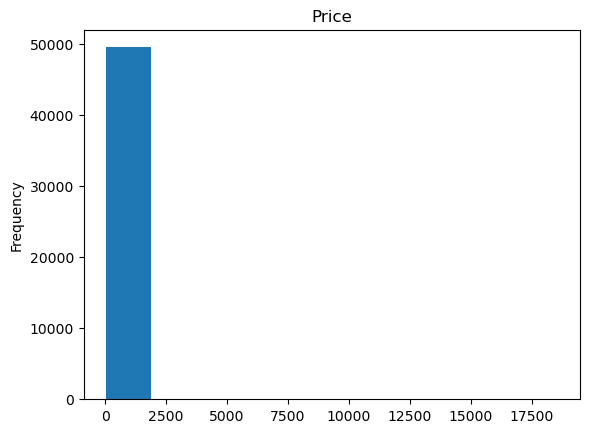

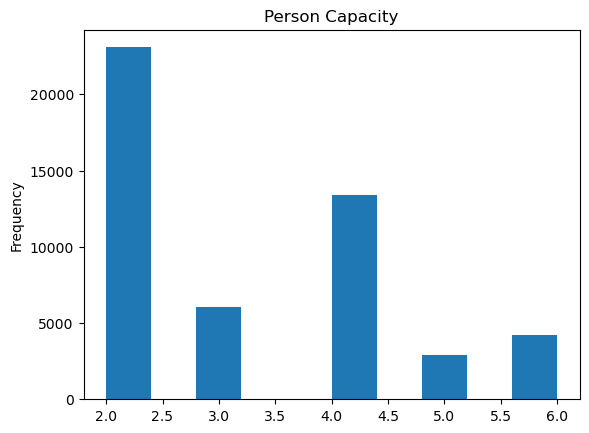

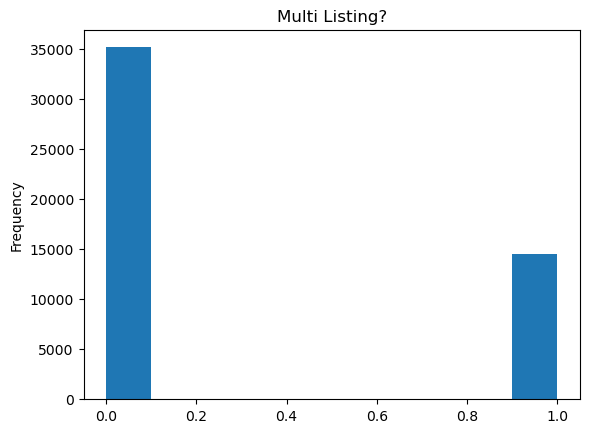

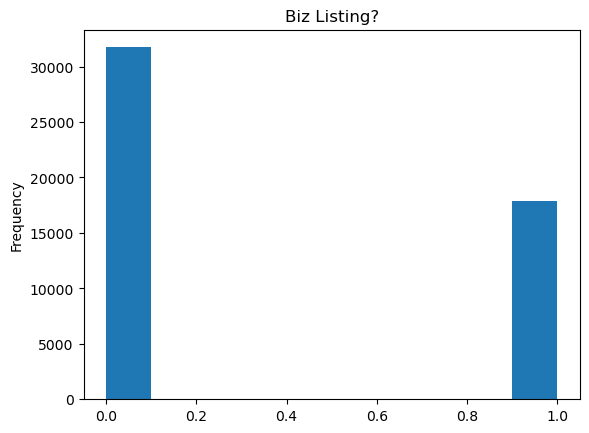

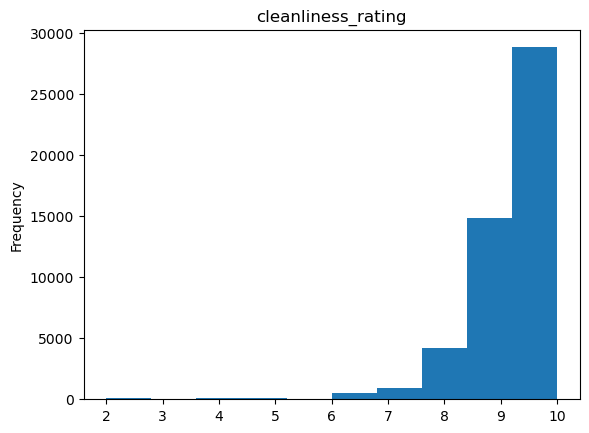

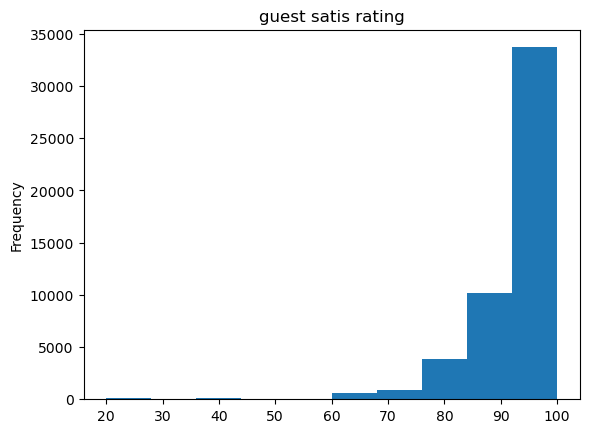

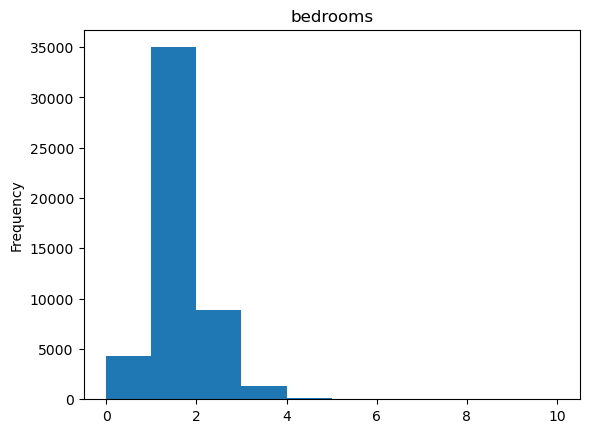

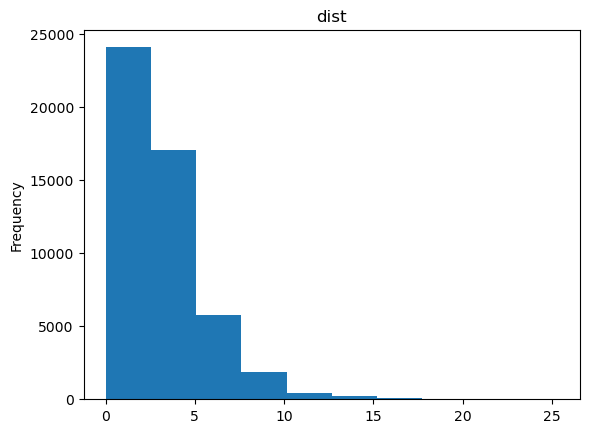

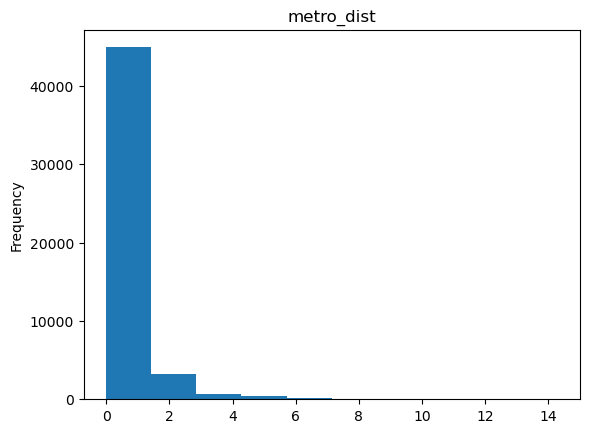

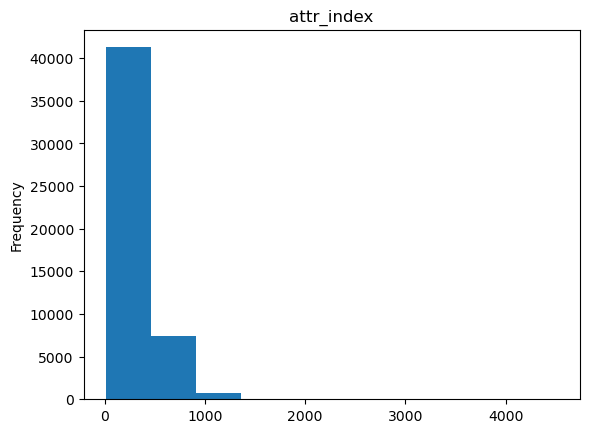

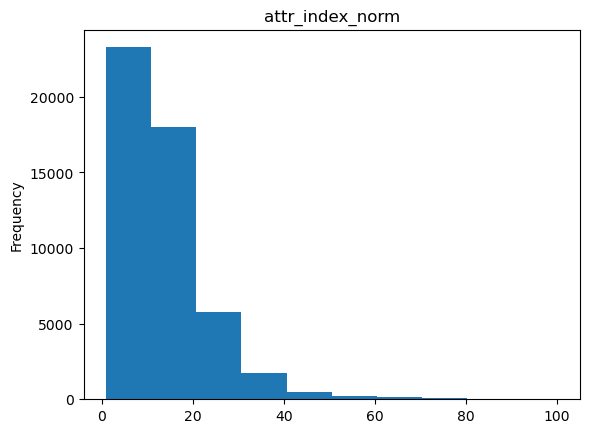

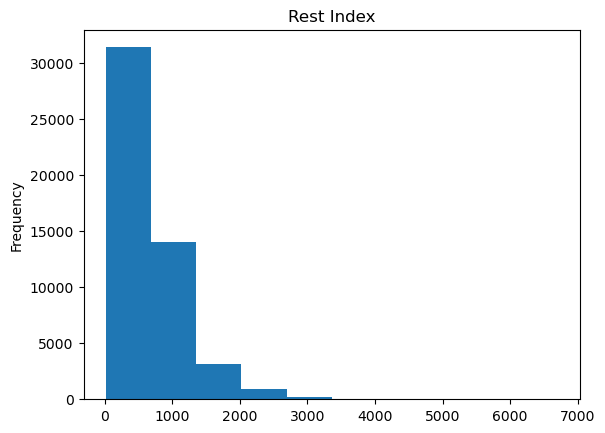

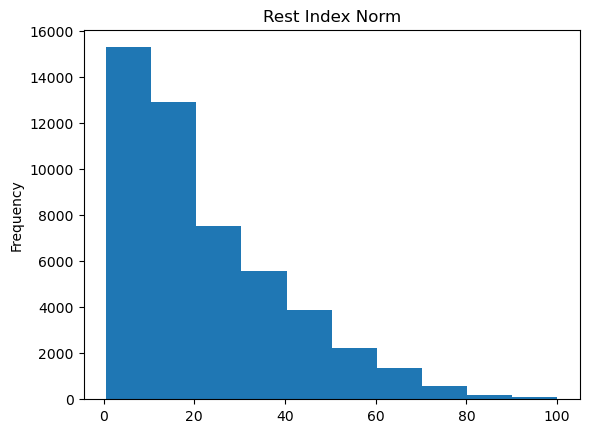

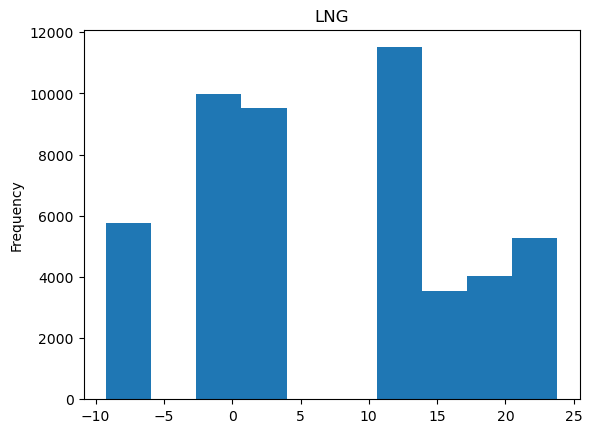

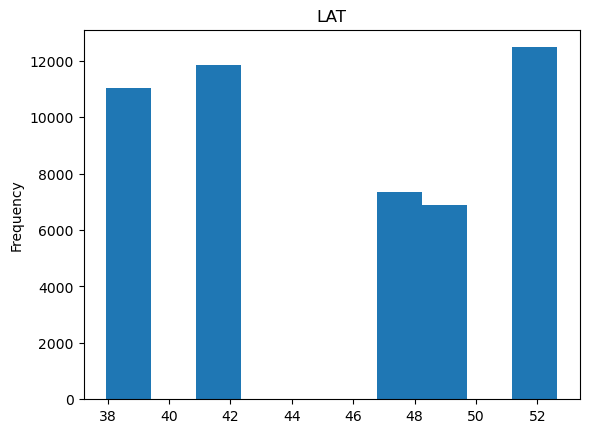

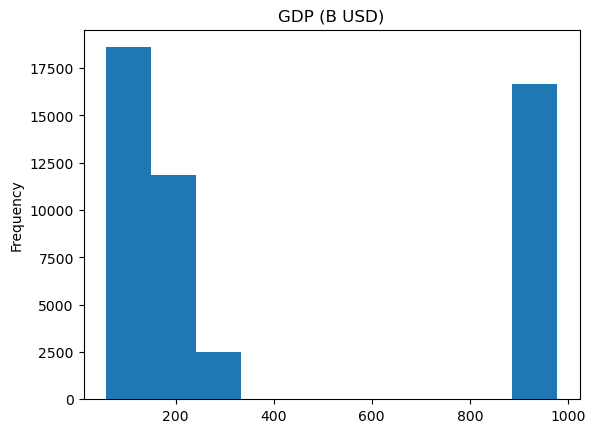

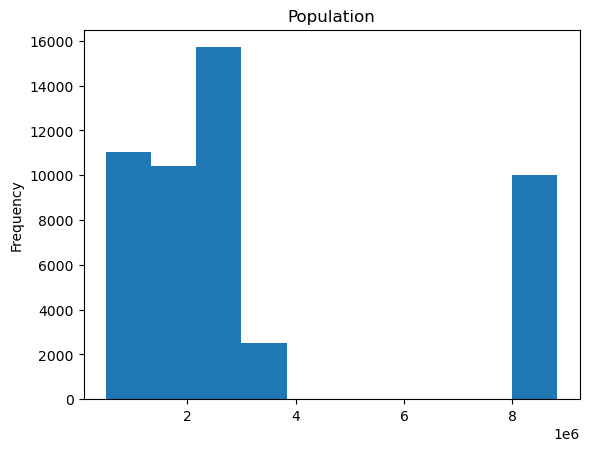

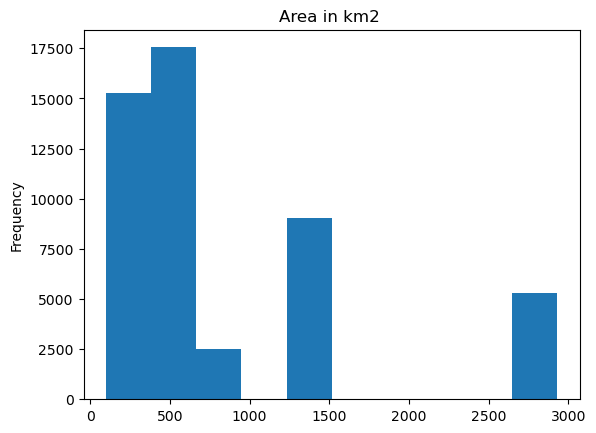

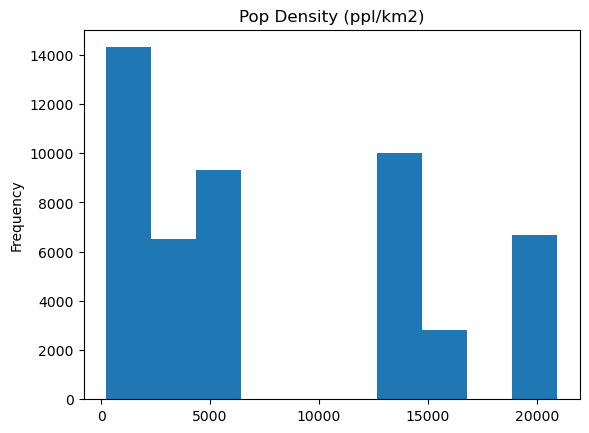

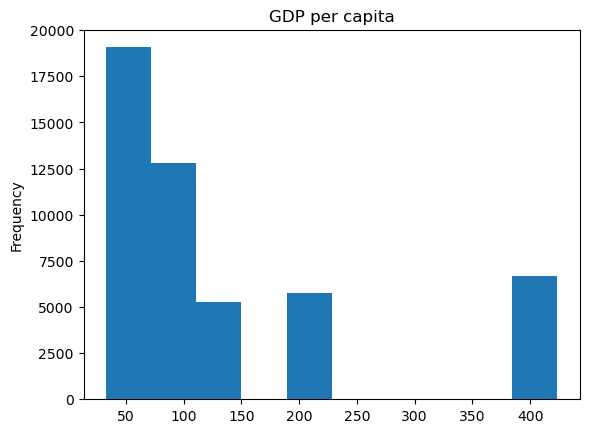

In [140]:
#Let's examine the histogram of these numeric columns
for col in euro_num_cols:
    eurobnb[col].plot(kind = 'hist', title = col)
    plt.show()

In outputted histograms above, we can clearly see outliers that are skewing and obfuscating the data

I will cut out the outliers later.

Let's describe the simple descriptions first

Also, from above histograms, the features of person capacity, dist, metro dist, attr_index, attr_index_norm, rest_index all follow similar histogram shapes vs price, suggesting they potentially follow a linear regression with price


C:\Users\Mark Lee\anaconda3\lib\site-packages\seaborn\categorical.py:3025: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


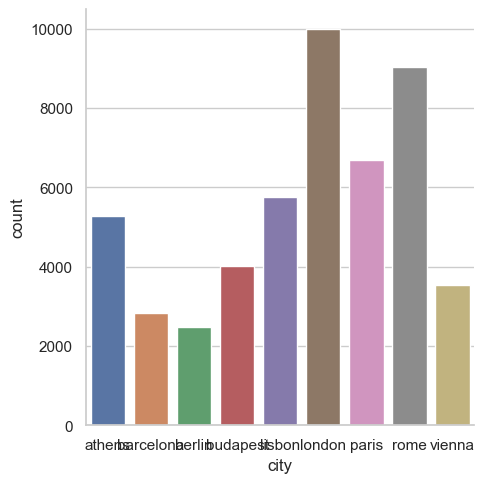

In [159]:
#Let's count the number of datapoints from each city


sns.set_style('whitegrid')
sns.catplot(x="city", 
            data=eurobnb, 
            kind="count", ax=ax)
            
plt.show()

#I've tried many different methods to resize this plot ..but can't seem to fix the sizing issue

Based on the counts above, Berlin, Barcelona, Budapest, and Vienna will weigh much less into the fit for future multivariate linear Regressions. This will skew the linear regression output towards the more heavily weighted cities, like London and Rome.

Ideally, within this case study, separate multi-variate linear regressions should be computed for each respective city (Unfortunately, not sure I will have time for a more robust model in this curriculum)

<AxesSubplot:xlabel='city', ylabel='Price'>

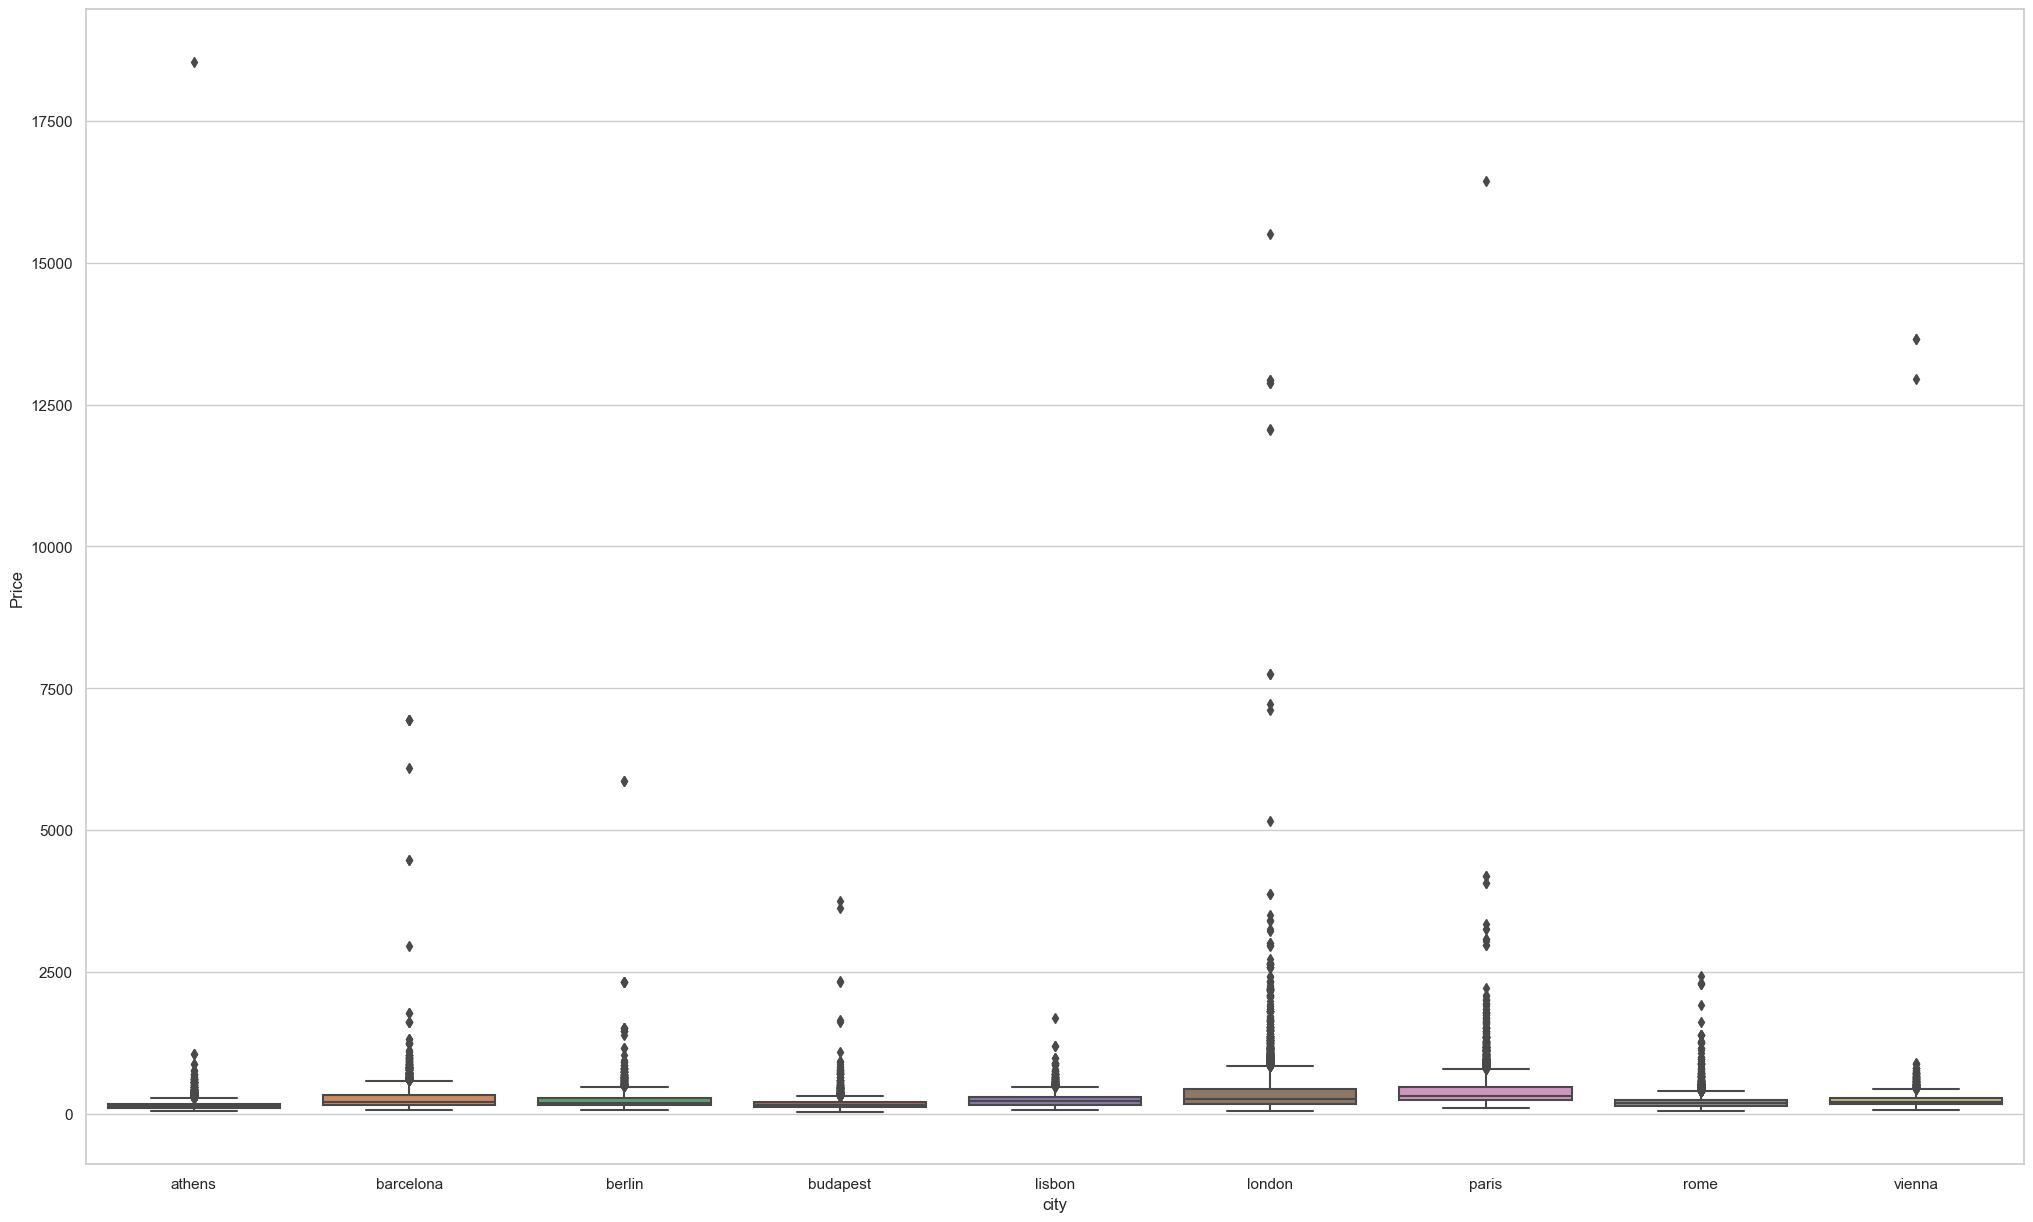

In [163]:
#Creating simple price comparisons between cities
sns.boxplot(data=eurobnb, x = 'city', y = 'Price')

<AxesSubplot:xlabel='city', ylabel='Price'>

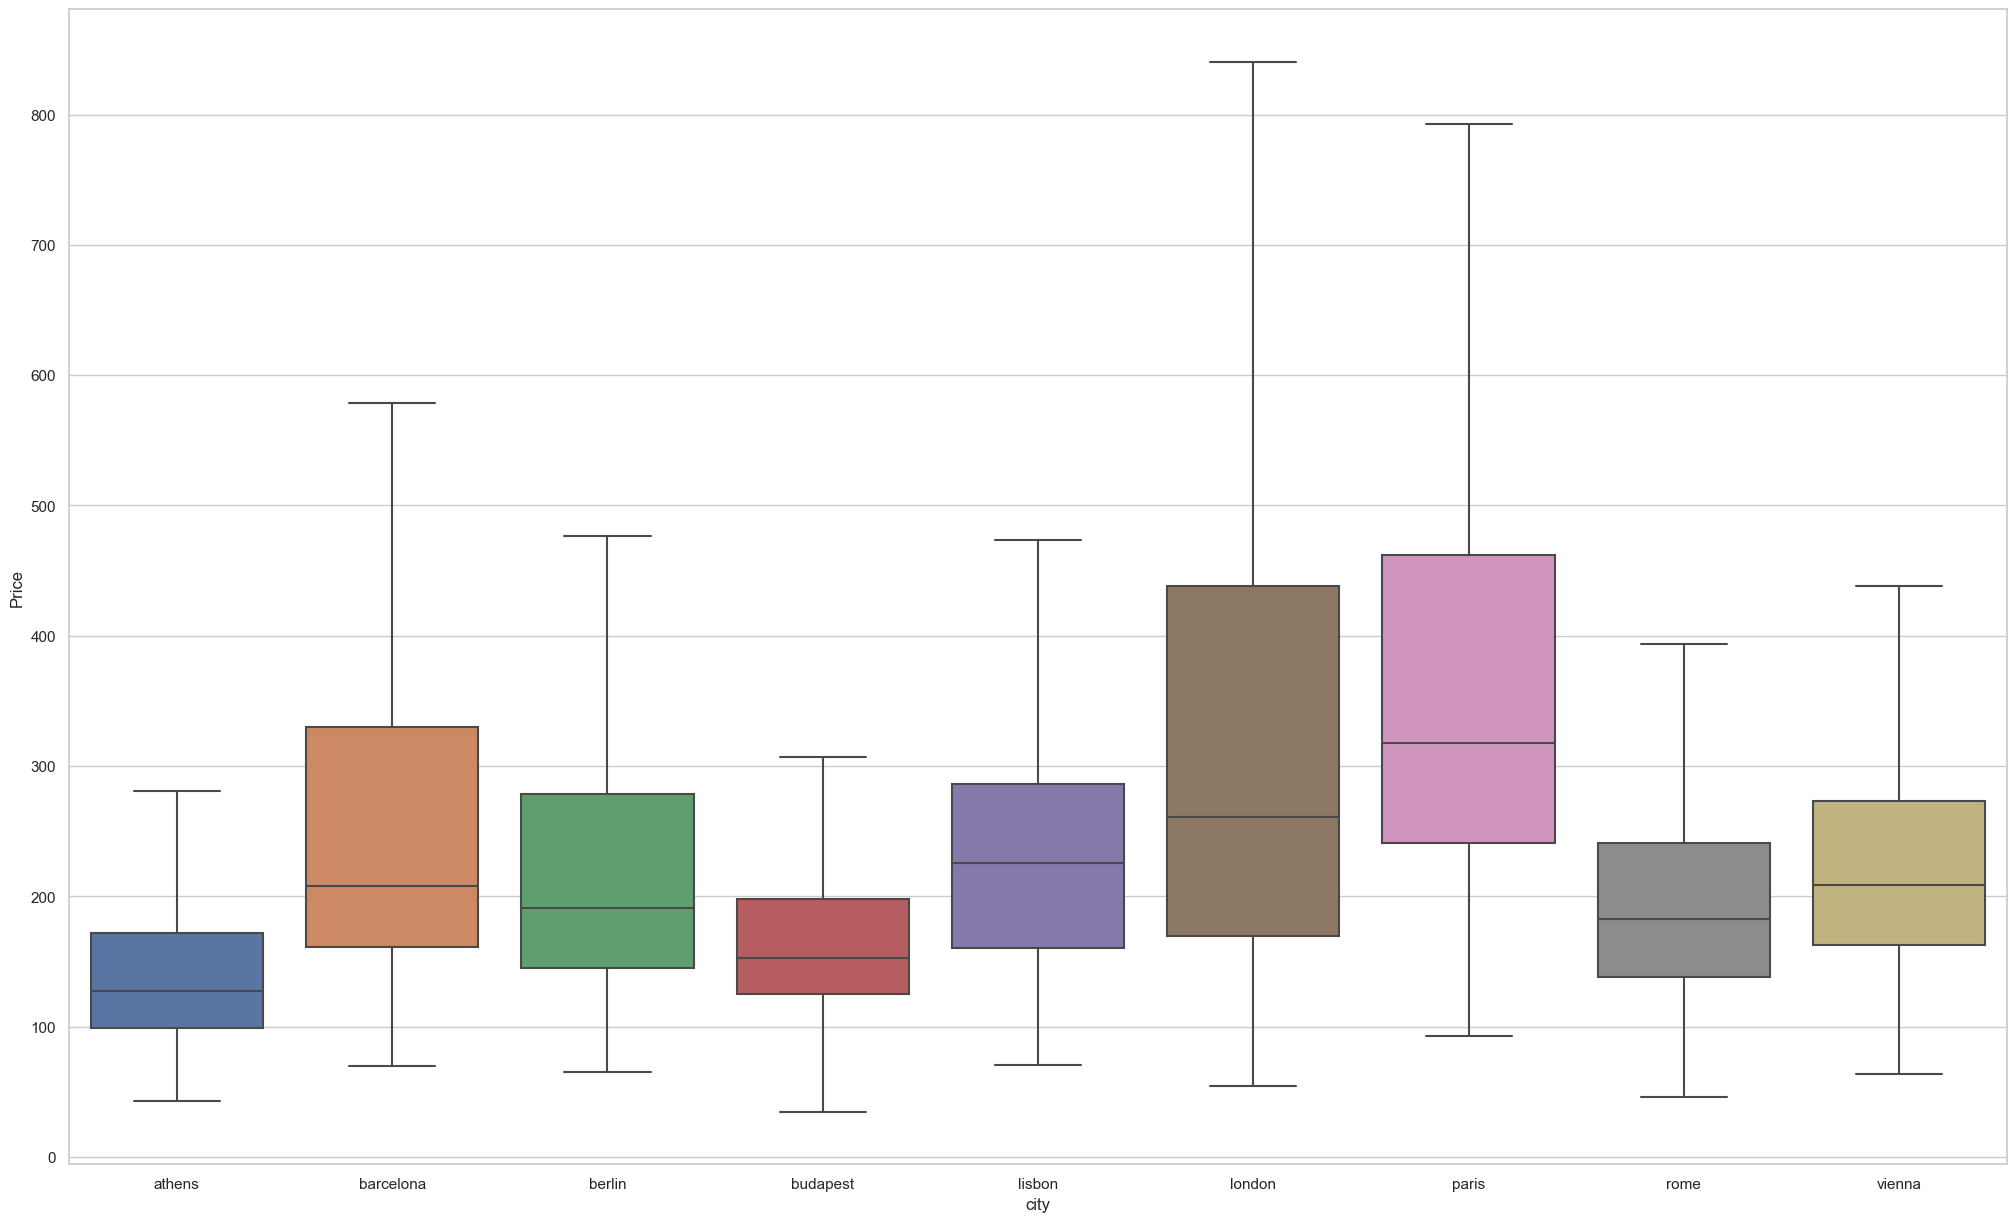

In [165]:
# Ok, wow, it's easy to eyeball the number of extreme outliers in most cities, especially London
# Let's again graph these boxplots without the outliers

sns.boxplot(data=eurobnb, x = 'city', y = 'Price', sym='')

Even after removing the extreme outliers, the data remains heavily skewed. 

Most conspicuously, this data suggests each city possesseses different pricing patterns and characteristics

Also, the data suggests there is no uniform increment in prices (there is heavy kurtosis), as in, Airbnb seems to possess a disproportionate amount of premium priced housing units

Notes on consumer psychology:
Also, it's important to note that there typically exists a differentiation in consumer psychology for products in the lower and medium price segments vs the premium segments
For instance, in laymen speak, rich people typically spend way more for products for different reasons vs the average consumer vs the bargain shoppers.

This data suggests I should experiment performing linear regression models separately for the lower to mid segment vs the premium segments because there probably exists different feature vs price patterns in these respective segments (Although not sure I will have time for this more robust prediction engine unfortunately)


<AxesSubplot:xlabel='Price', ylabel='Count'>

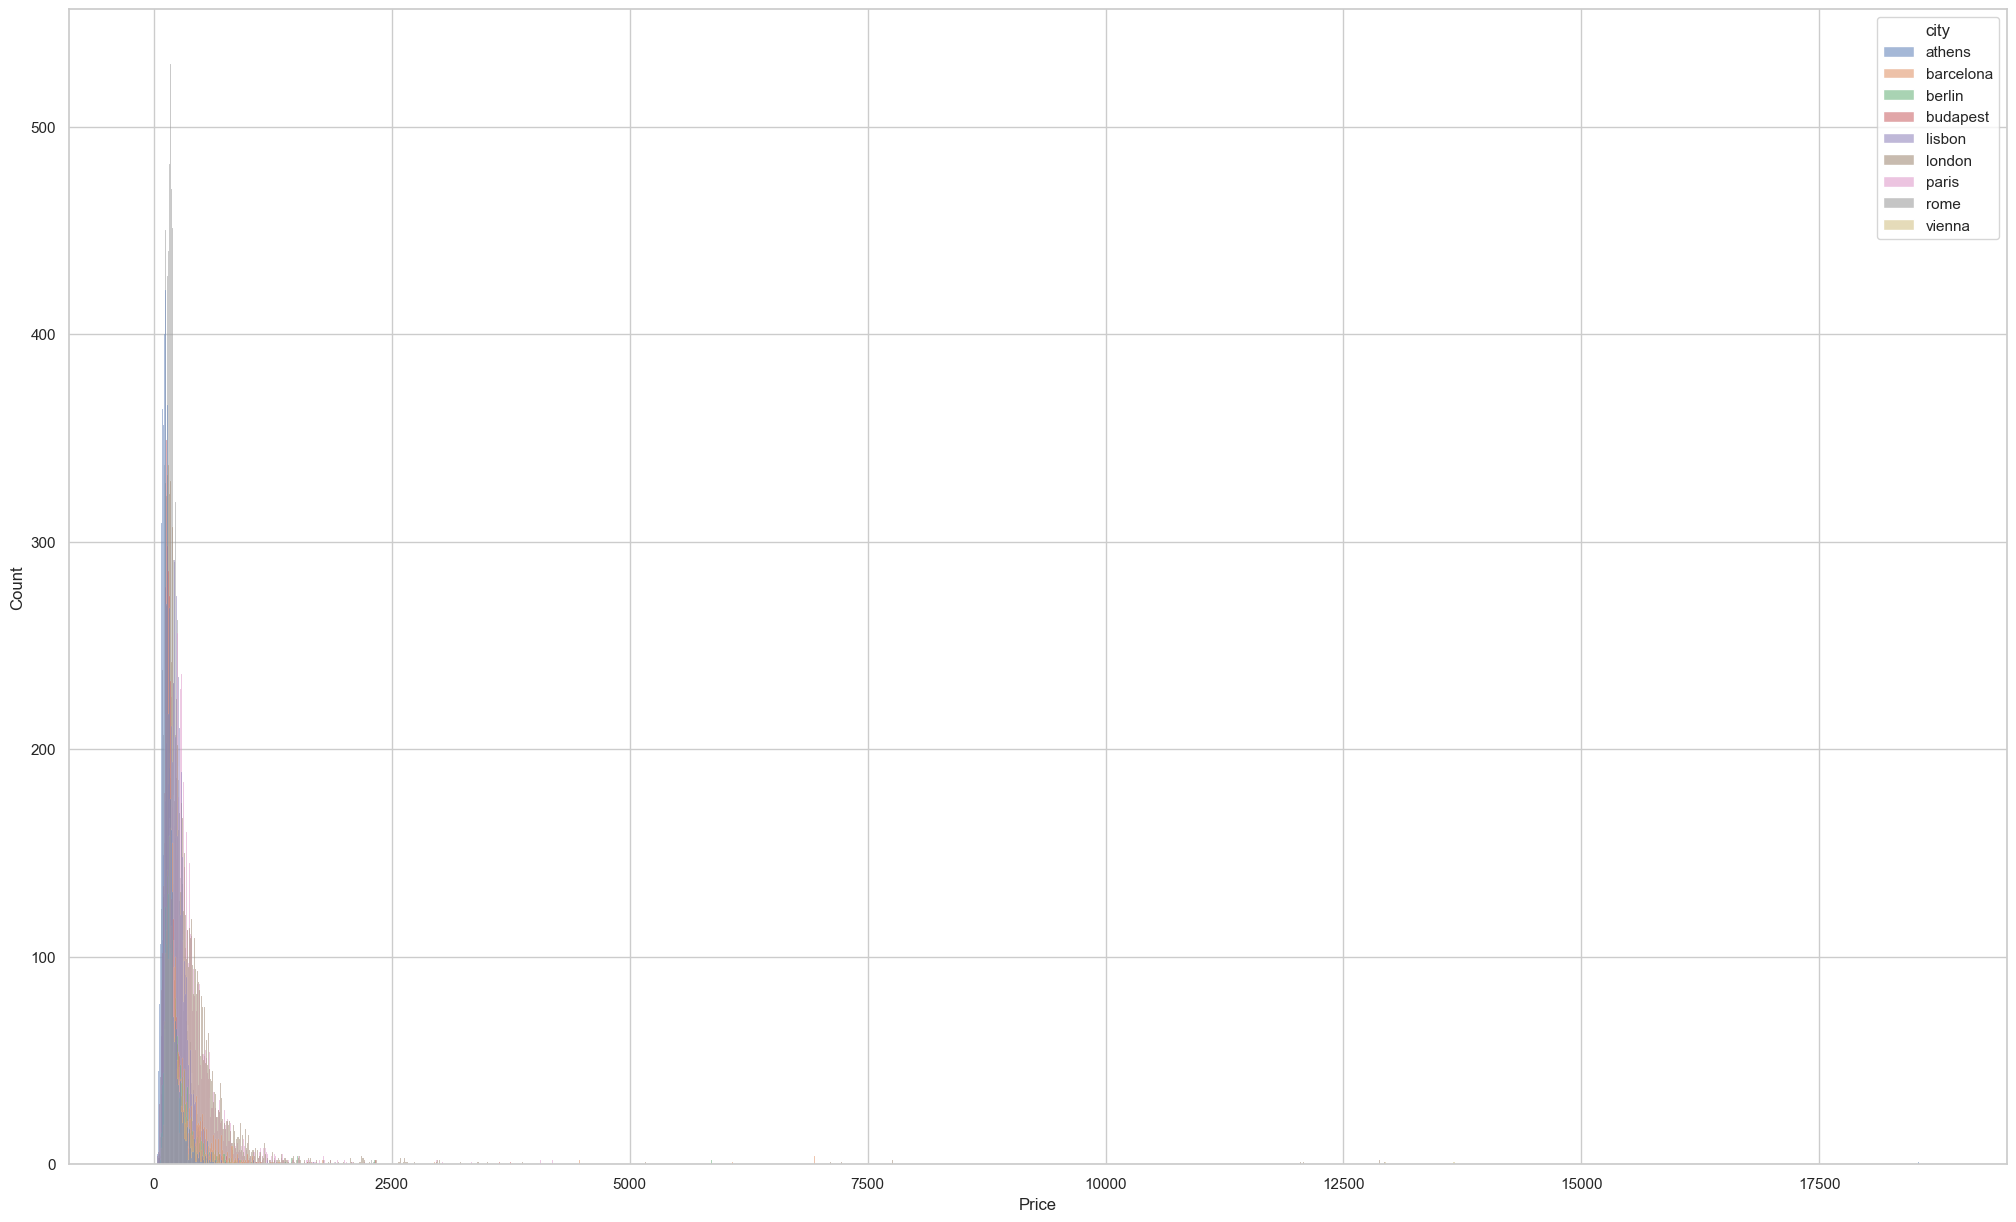

In [168]:
# Let's create a scatterplot in order to gain a more granular view on how price distribution from low to high-end units

sns.histplot(data=eurobnb, x='Price', hue='city')

In [169]:
# Ok, let's obviously clear the outliers for a more meaningful plot 
# Based on the previous boxplots, prices above 860 are the outliers to every city, so let's set a new dataframe that includes prices < 860
# I will have to return later to investigate the characteristics of Airbnb units above 860 to investigate further why Airbnb has such extreme outliers

eurobnb_no = eurobnb[eurobnb['Price'] < 860]


<AxesSubplot:xlabel='Price', ylabel='Count'>

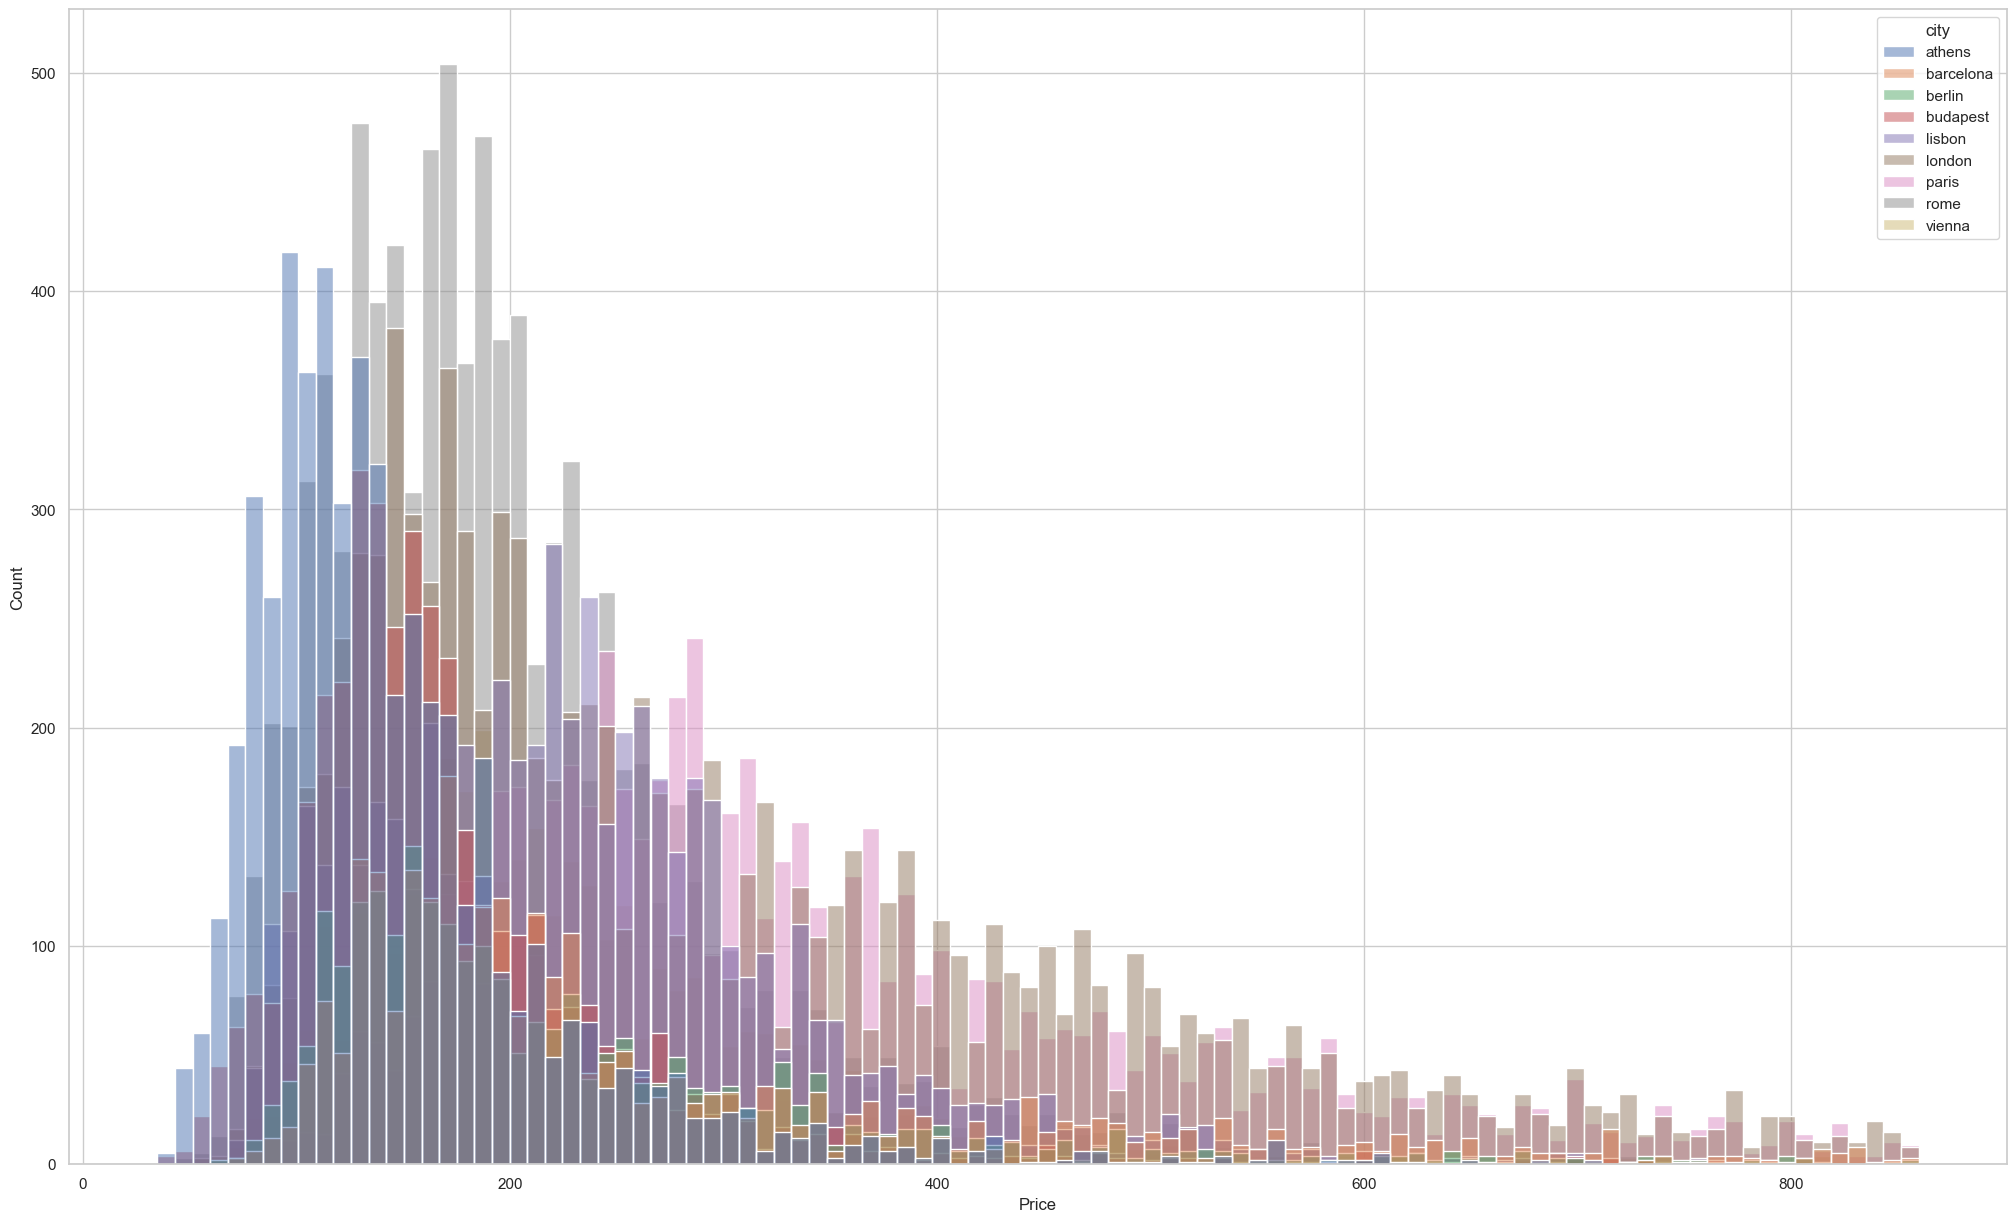

In [170]:
# Plotting the dataframe without outliers

sns.histplot(data=eurobnb_no, x='Price', hue='city')

#Note, not sure how to re-size the legend and x and y tick labels

Although its difficult to discern, all the cities typically follow a normal distribution of price with a skew (kurtosis) towards the right

This further confirms the above characterization that Airbnb possesses a heavy emphasis towards premium units

Personally, I wonder if US Airbnb units follow this skewed distribution (although I don't have this data)


<AxesSubplot:xlabel='city', ylabel='Price'>

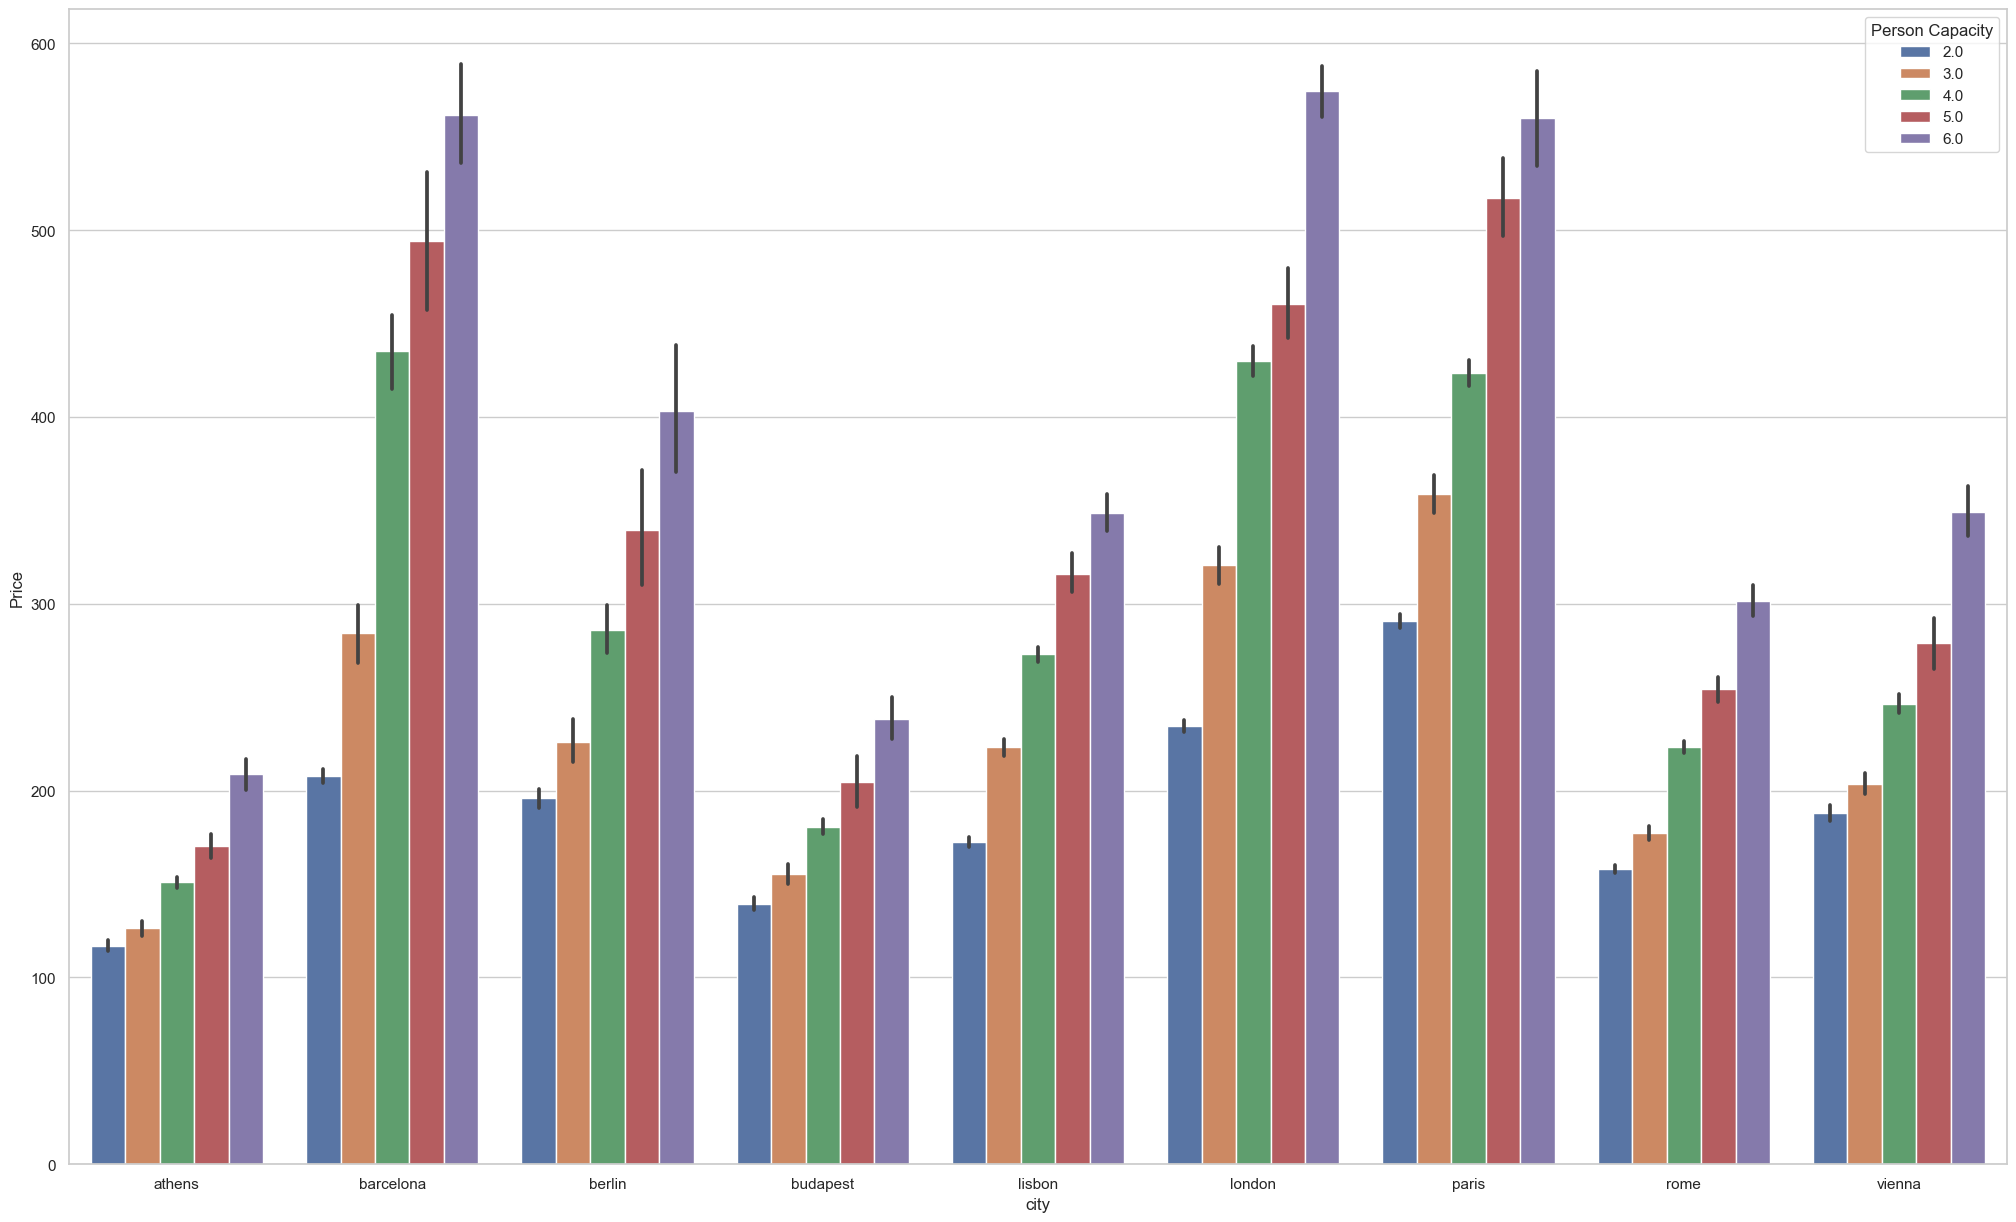

In [175]:
# Let's incorporate another feature into this price vs city equation - person capacity

sns.barplot(data=eurobnb_no, x='city', y='Price', hue='Person Capacity')

As expected, the price increments linearly each additionally capacity for a person. 

This variable will probably figure meaningfully during the linear regression fit model

Side note: Also as expected - and much easier to see via this plot - Western Europe possesses a much higher price segment vs Eastern Europe.



<AxesSubplot:xlabel='city', ylabel='Price'>

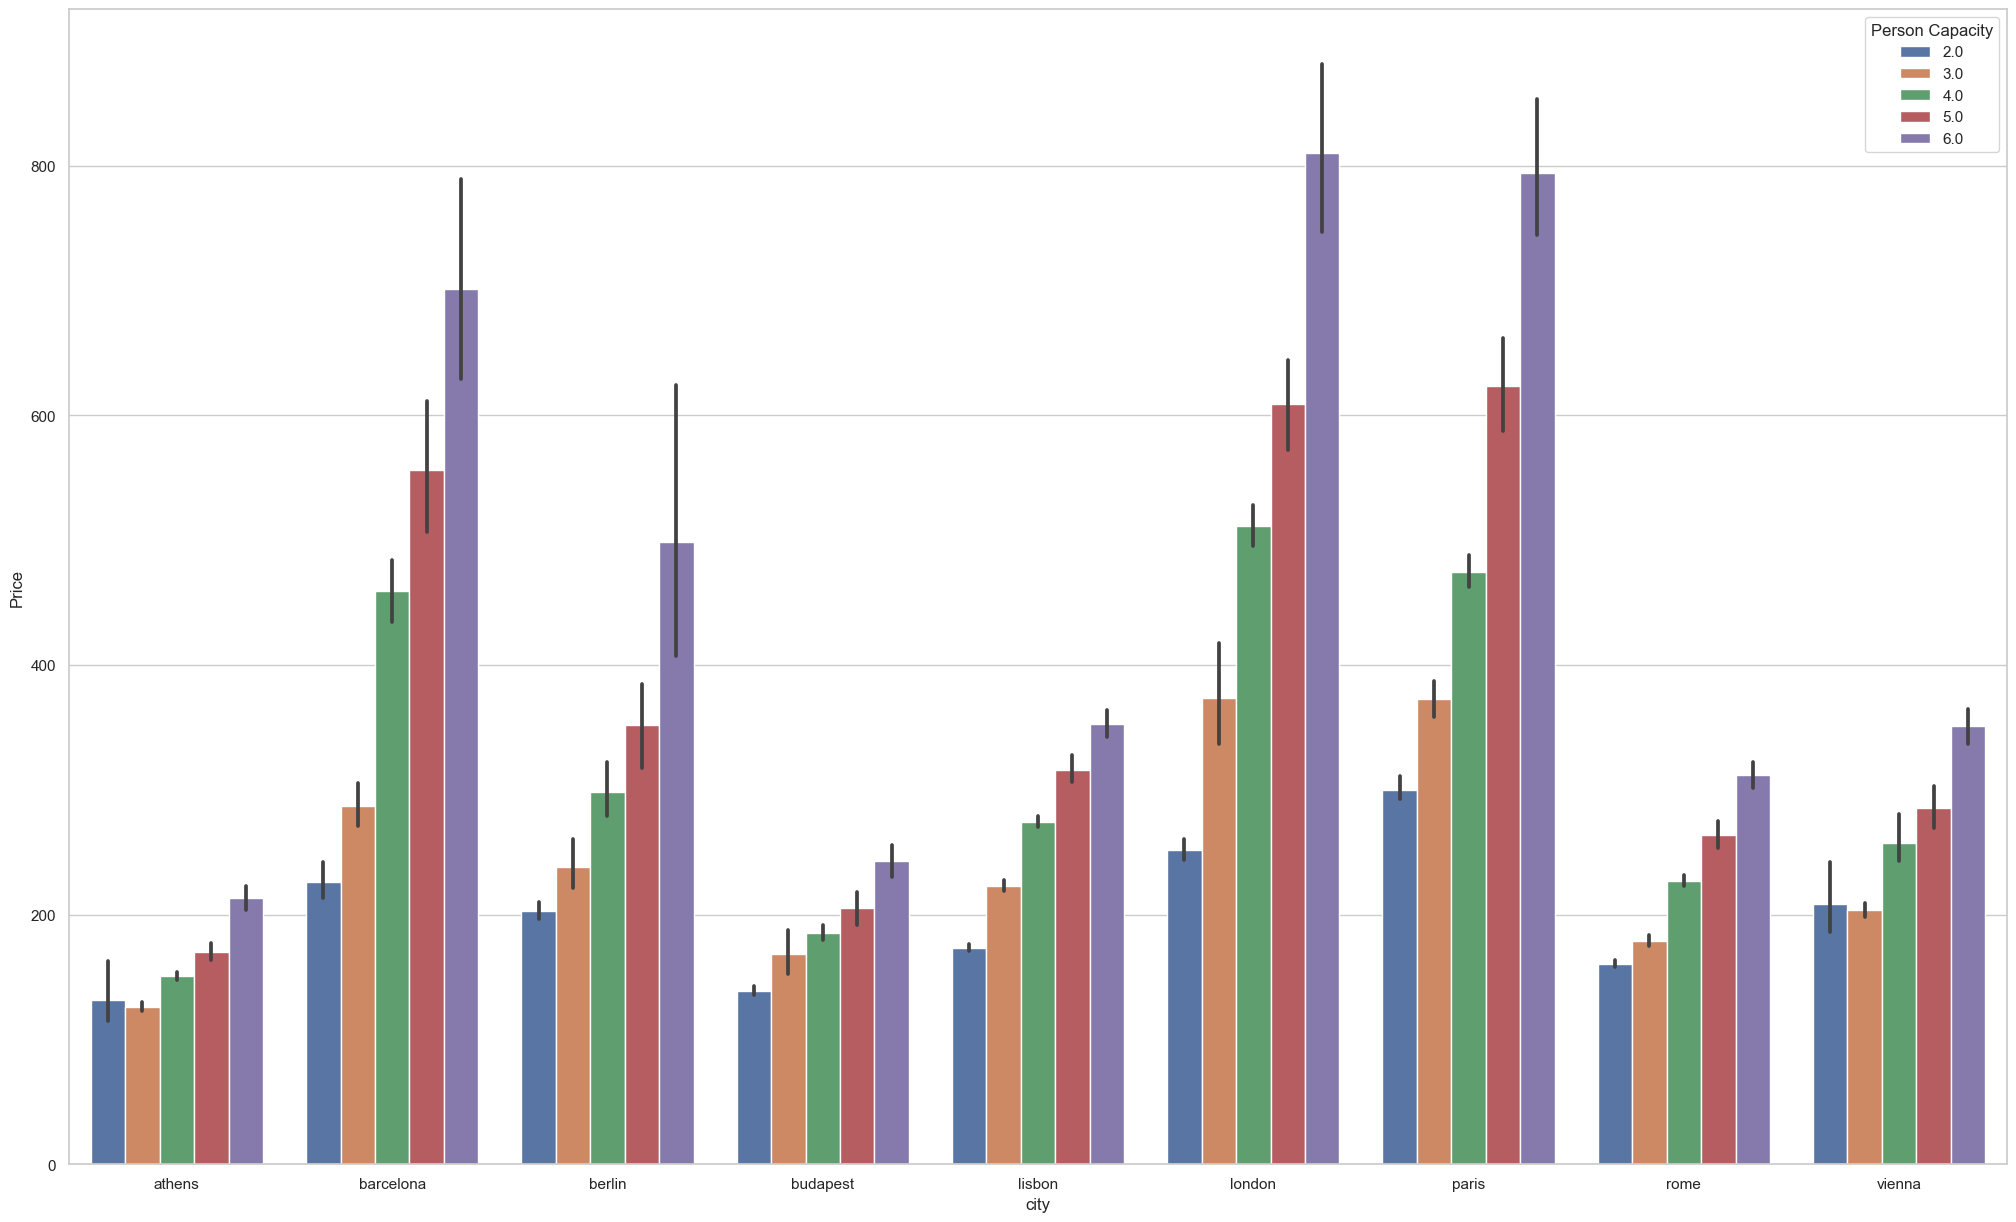

In [176]:
# I'm actually curious if this same relationships holds if we re-incorporate the previously removed outliers

sns.barplot(data=eurobnb, x='city', y='Price', hue='Person Capacity')

Ok, the relationship holds and actually helpled sparked the insight that perhaps there are extreme outliers because Airbnb is
not simply hosting simple housing units, but perhaps, also including much bigger mansions and venues onto its platform.

I need to re-investigate how this dataset defines person capacity, especially the '6' person capacity. Perhaps the biggest venues still input 6 as person capacity despite having a much larger capacity. 

This may help explain the extreme outliers

Also note:

I'm a bit confused that this above barplot doesn't include prices above 860, when there were outliers with price way above 3000

I really should investigate the datapoints for Airbnbs above 860

In [180]:
eurobnb[eurobnb['Price']>860].sample(50)
# As easily discernable, there are prices above 2000 in this sample. Why are these datapoints not showing up in the above plot..hmm.
# I will get back to this later

Price        Room Type  Shared Room  Private Room  \
6406     914.189960     Private room        False          True   
34403   1170.658962  Entire home/apt        False         False   
20437   2180.436981  Entire home/apt        False         False   
30432    921.101687  Entire home/apt        False         False   
27213   1095.510242  Entire home/apt        False         False   
29383    956.983937     Private room        False          True   
33015   1848.960761  Entire home/apt        False         False   
39318   1380.777593  Entire home/apt        False         False   
25831   1401.961476  Entire home/apt        False         False   
24361    872.786284  Entire home/apt        False         False   
24350   1045.650180  Entire home/apt        False         False   
24062    922.881535     Private room        False          True   
30762    889.644888  Entire home/apt        False         False   
22027   2185.611139     Private room        False          True   
27613    979.326889  Entire home/apt        False         False   
36140   1517.149781  Entire home/apt        False         False   
31035   2024.419797  Entire home/apt        False         False   
29464    969.684141  Entire home/apt        False         False   
30129   1371.386909  Entire home/apt        False         False   
34697   1182.309628  Entire home/apt        False         False   
47370    881.191127  Entire home/apt        False         False   
9936    1507.431990  Entire home/apt        False         False   
21996    894.894047  Entire home/apt        False         False   
7600    1770.661205  Entire home/apt        False         False   
20899   2200.192855  Entire home/apt        False         False   
31262   1147.357629  Entire home/apt        False         False   
32609   1600.801566  Entire home/apt        False         False   
1250     869.167858  Entire home/apt        False         False   
26269   1630.094781  Entire home/apt        False         False   
6595     879.744921  Entire home/apt        False         False   
23348    956.513559  Entire home/apt        False         False   
23541   1700.886662  Entire home/apt        False         False   
30740    987.044459  Entire home/apt        False         False   
36695    972.131606  Entire home/apt        False         False   
31190   1235.436667  Entire home/apt        False         False   
34211   1128.949576  Entire home/apt        False         False   
31089   1738.512443  Entire home/apt        False         False   
37418   2286.956725  Entire home/apt        False         False   
29179    934.876173  Entire home/apt        False         False   
29696    908.770197  Entire home/apt        False         False   
21619    962.158094  Entire home/apt        False         False   
28638    932.759472  Entire home/apt        False         False   
23549  12886.239093  Entire home/apt        False         False   
25905   1033.655542  Entire home/apt        False         False   
10200   1449.004394  Entire home/apt        False         False   
33583   1187.435921     Private room        False          True   
29964   1940.779416  Entire home/apt        False         False   
28952   1083.985983  Entire home/apt        False         False   
23675   1114.795738  Entire home/apt        False         False   
31549   1535.790847  Entire home/apt        False         False   

       Person Capacity  Superhost?  Multi Listing?  Biz Listing?  \
6406               6.0       False               0             1   
34403              2.0       False               0             0   
20437              6.0       False               1             0   
30432              6.0       False               0             1   
27213              4.0       False               0             0   
29383              2.0       False               0             0   
33015              4.0       False               1             0   
39318              2.0       False               0  

<AxesSubplot:xlabel='city', ylabel='Price'>

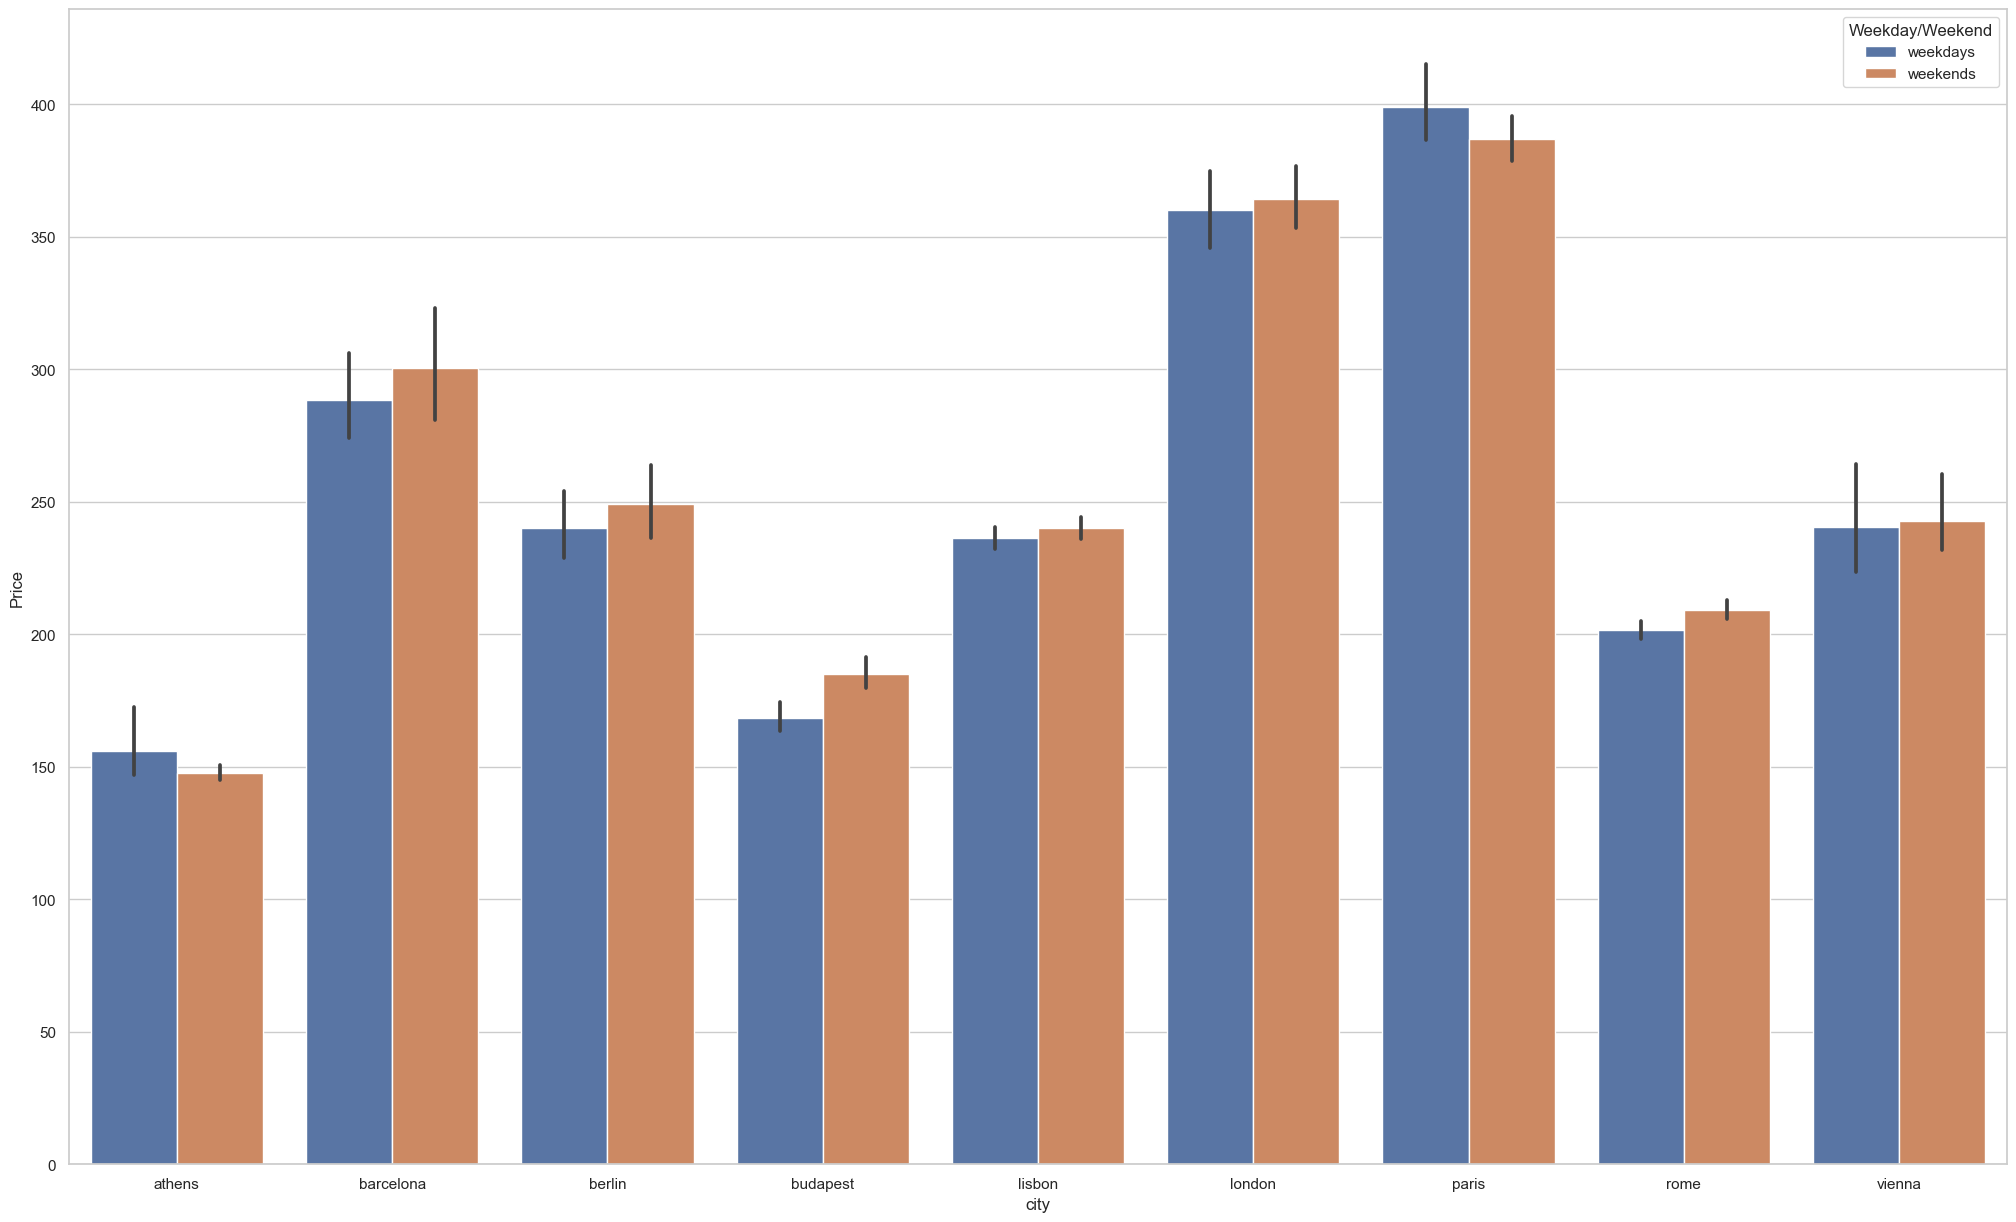

In [202]:
# Surprisingly, Weekdays and Weekends actually do not diverge much, and actually, for some cities, Weekday's are more expensive
sns.barplot(data=eurobnb, x='city', y='Price', hue='Weekday/Weekend')

<AxesSubplot:xlabel='city', ylabel='Price'>

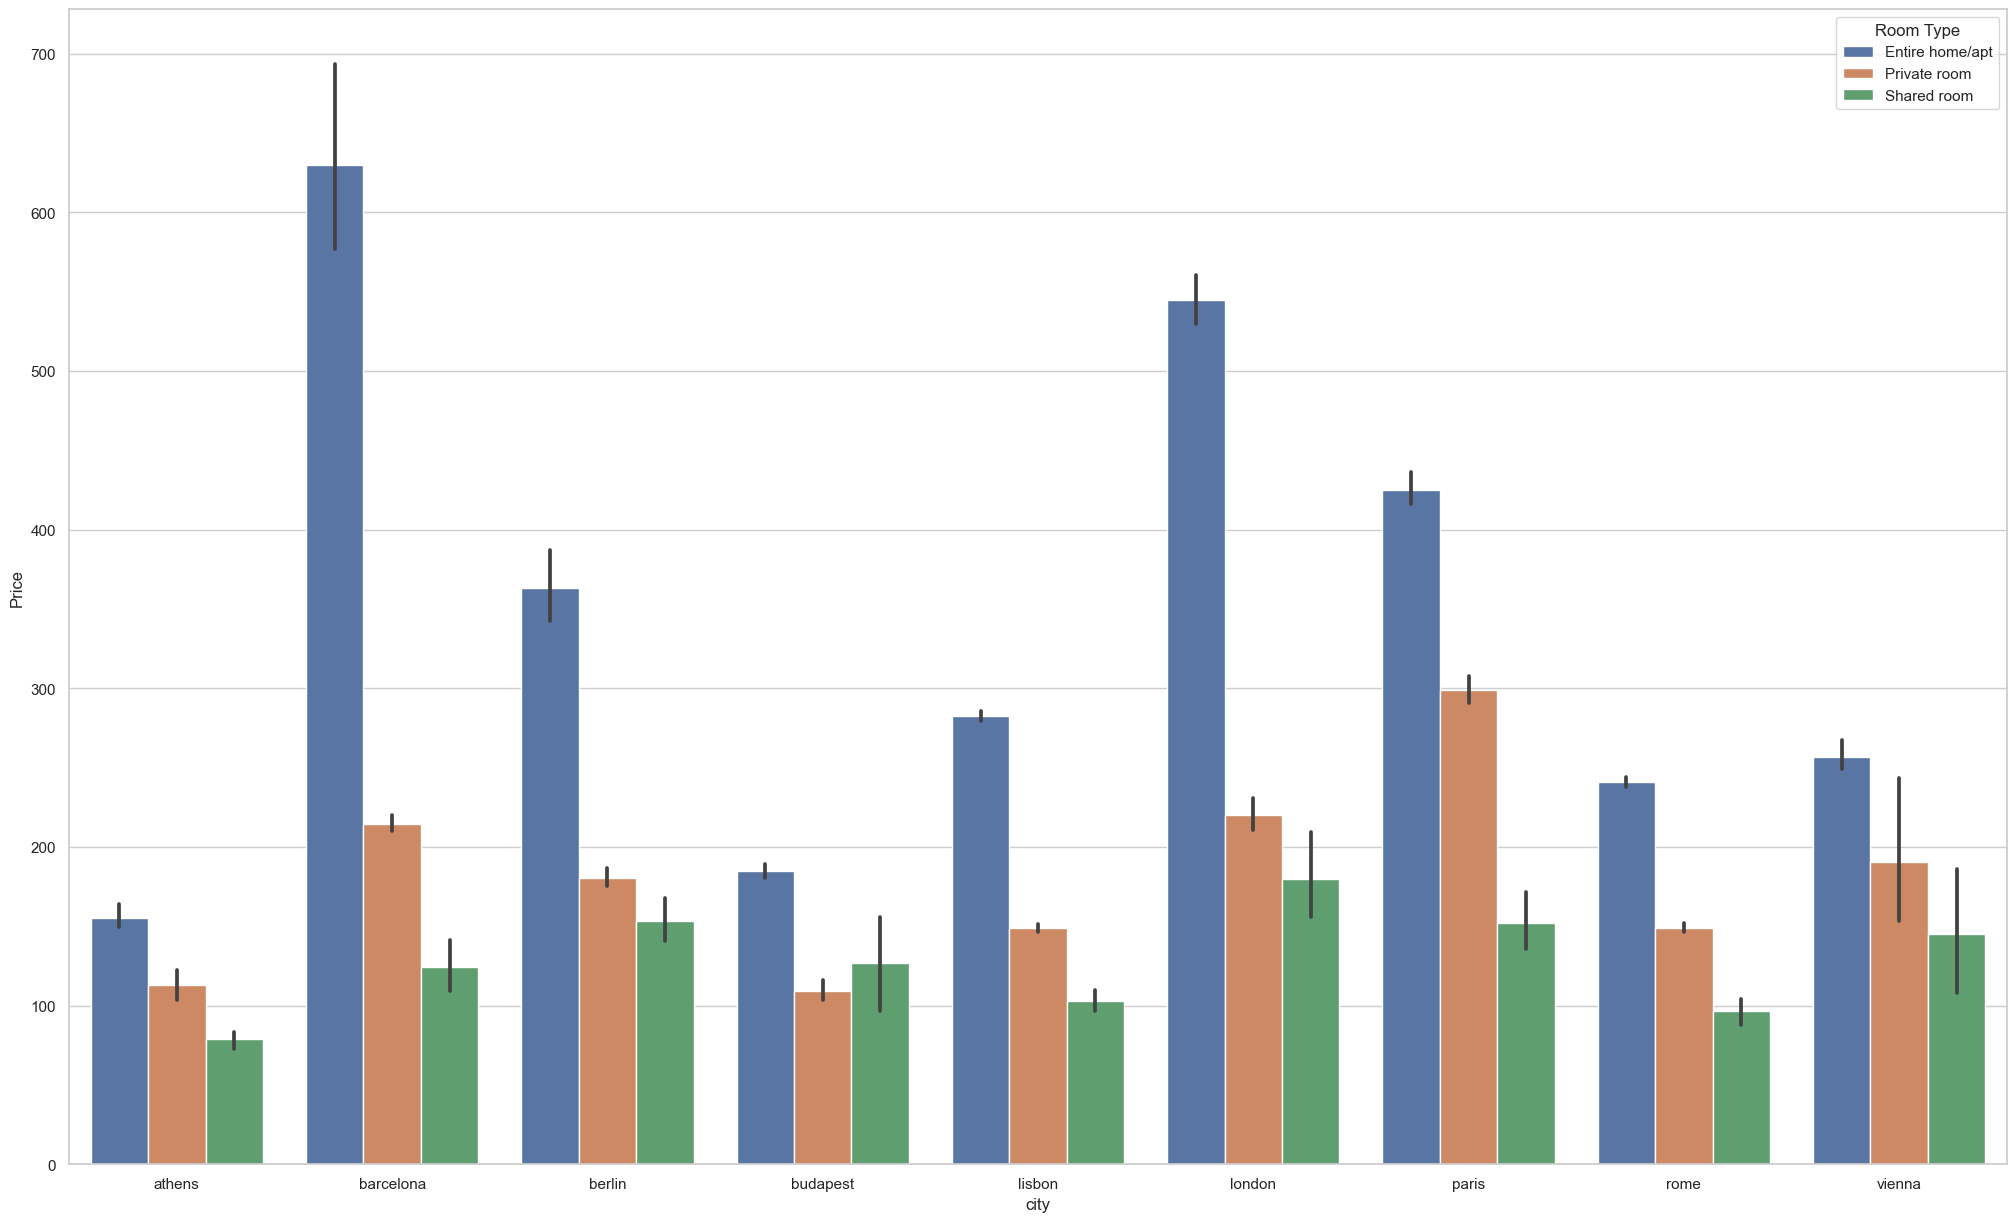

In [203]:
# There is a concrete relationship between room type vs price
# Entire home/apt costs more, which is expected
sns.barplot(data=eurobnb, x='city', y='Price', hue='Room Type')

<AxesSubplot:xlabel='city', ylabel='Price'>

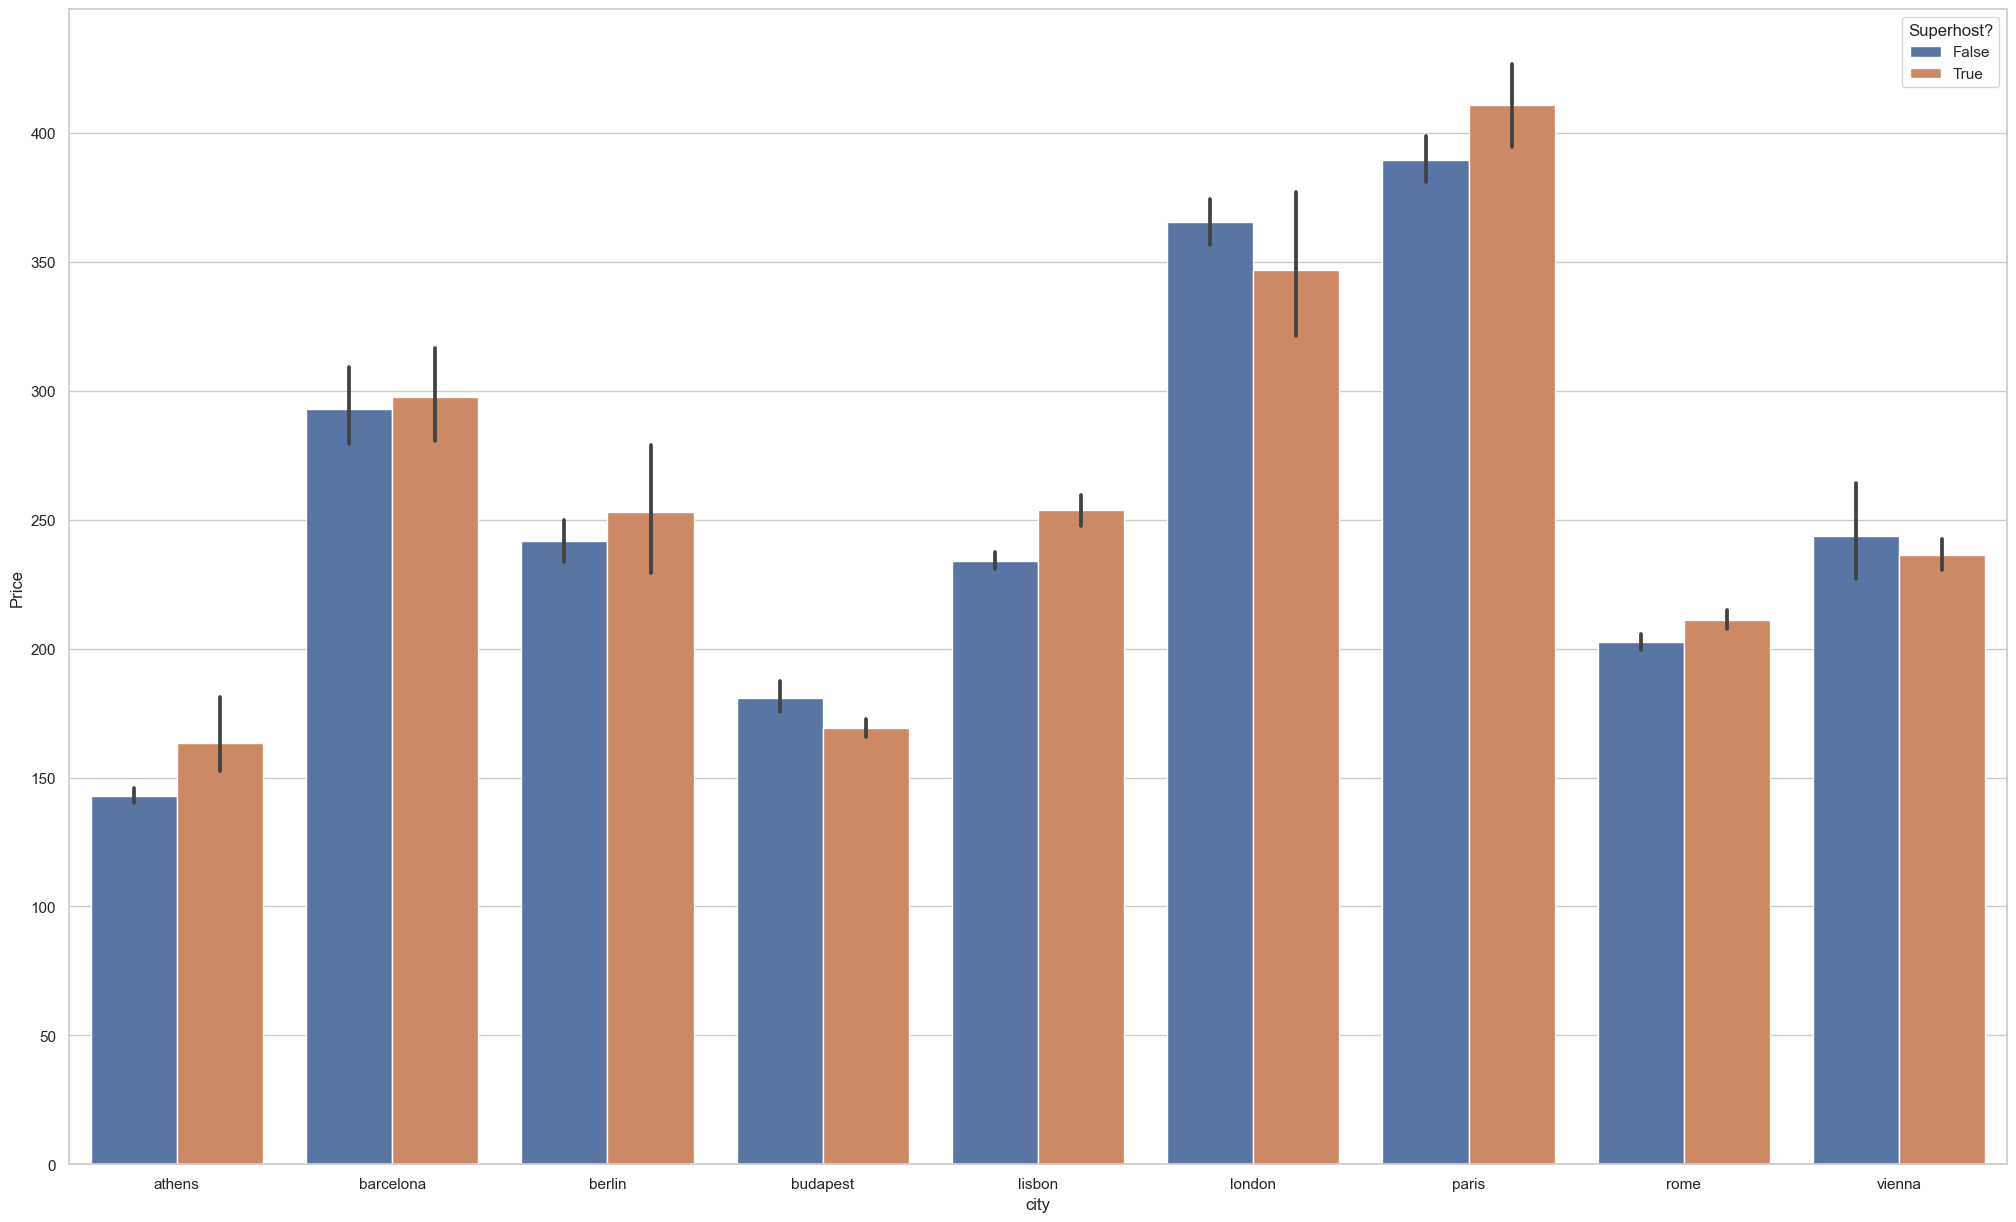

In [204]:
# Superhost vs not superhost prices actually do not diverge as significantly as I personally expected
sns.barplot(data=eurobnb, x='city', y='Price', hue='Superhost?')

<AxesSubplot:xlabel='guest satis rating', ylabel='Price'>

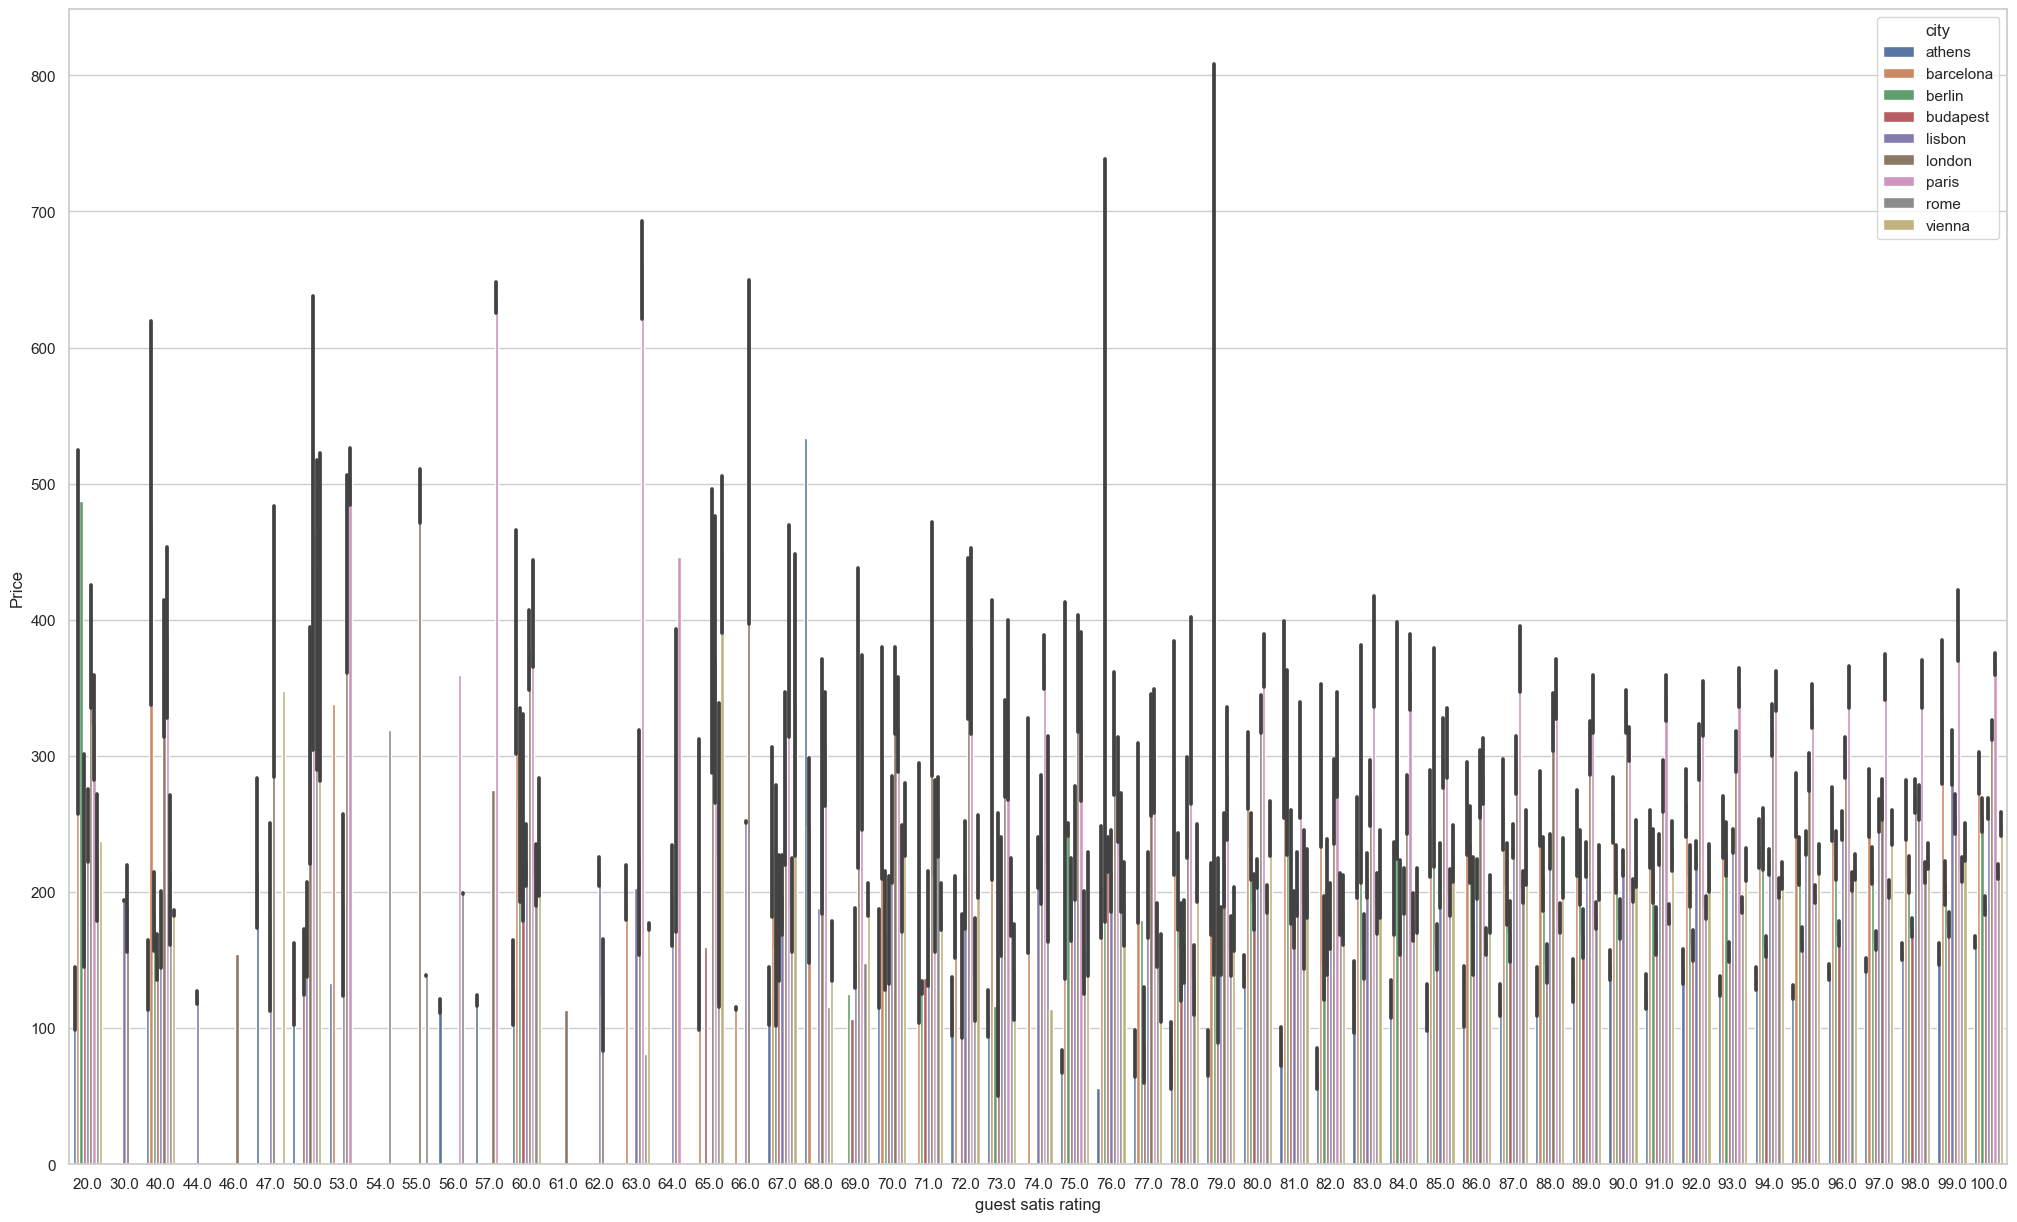

In [216]:
# There does not exist a strong linear relationships between customer satisfaction rating vs price
# I'm aware in the future I can reshape the "Guest Satis Rating" column into smaller categories before plotting it vs price
sns.barplot(data=eurobnb_no, x='guest satis rating', y='Price', hue='city')

<AxesSubplot:xlabel='GDP per capita', ylabel='Price'>

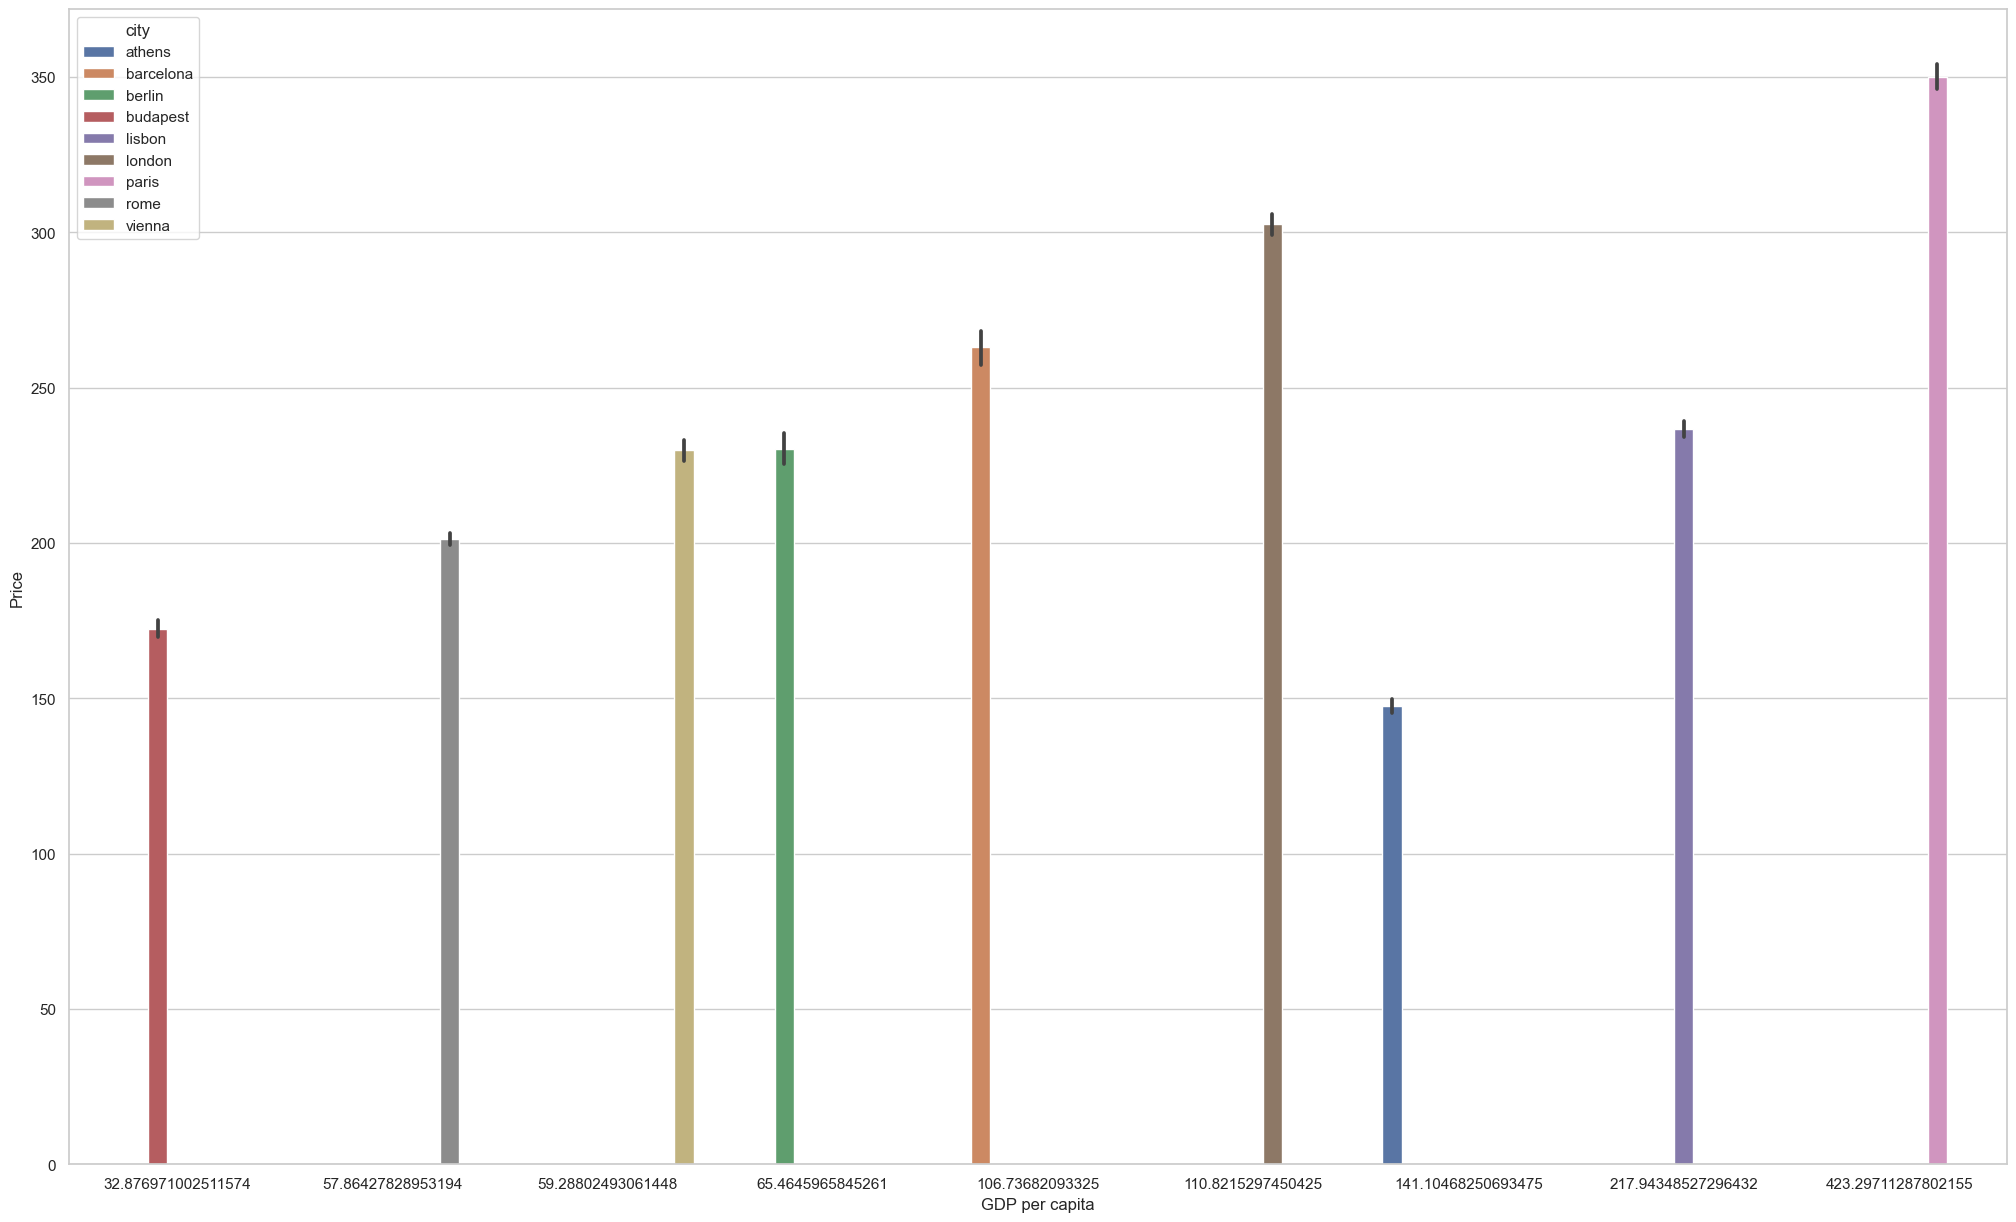

In [218]:
# There exists a weak linear relationship between GDP per capita vs price
sns.barplot(data=eurobnb_no, x='GDP per capita', y='Price', hue='city')

<AxesSubplot:xlabel='attr_index_norm', ylabel='Price'>

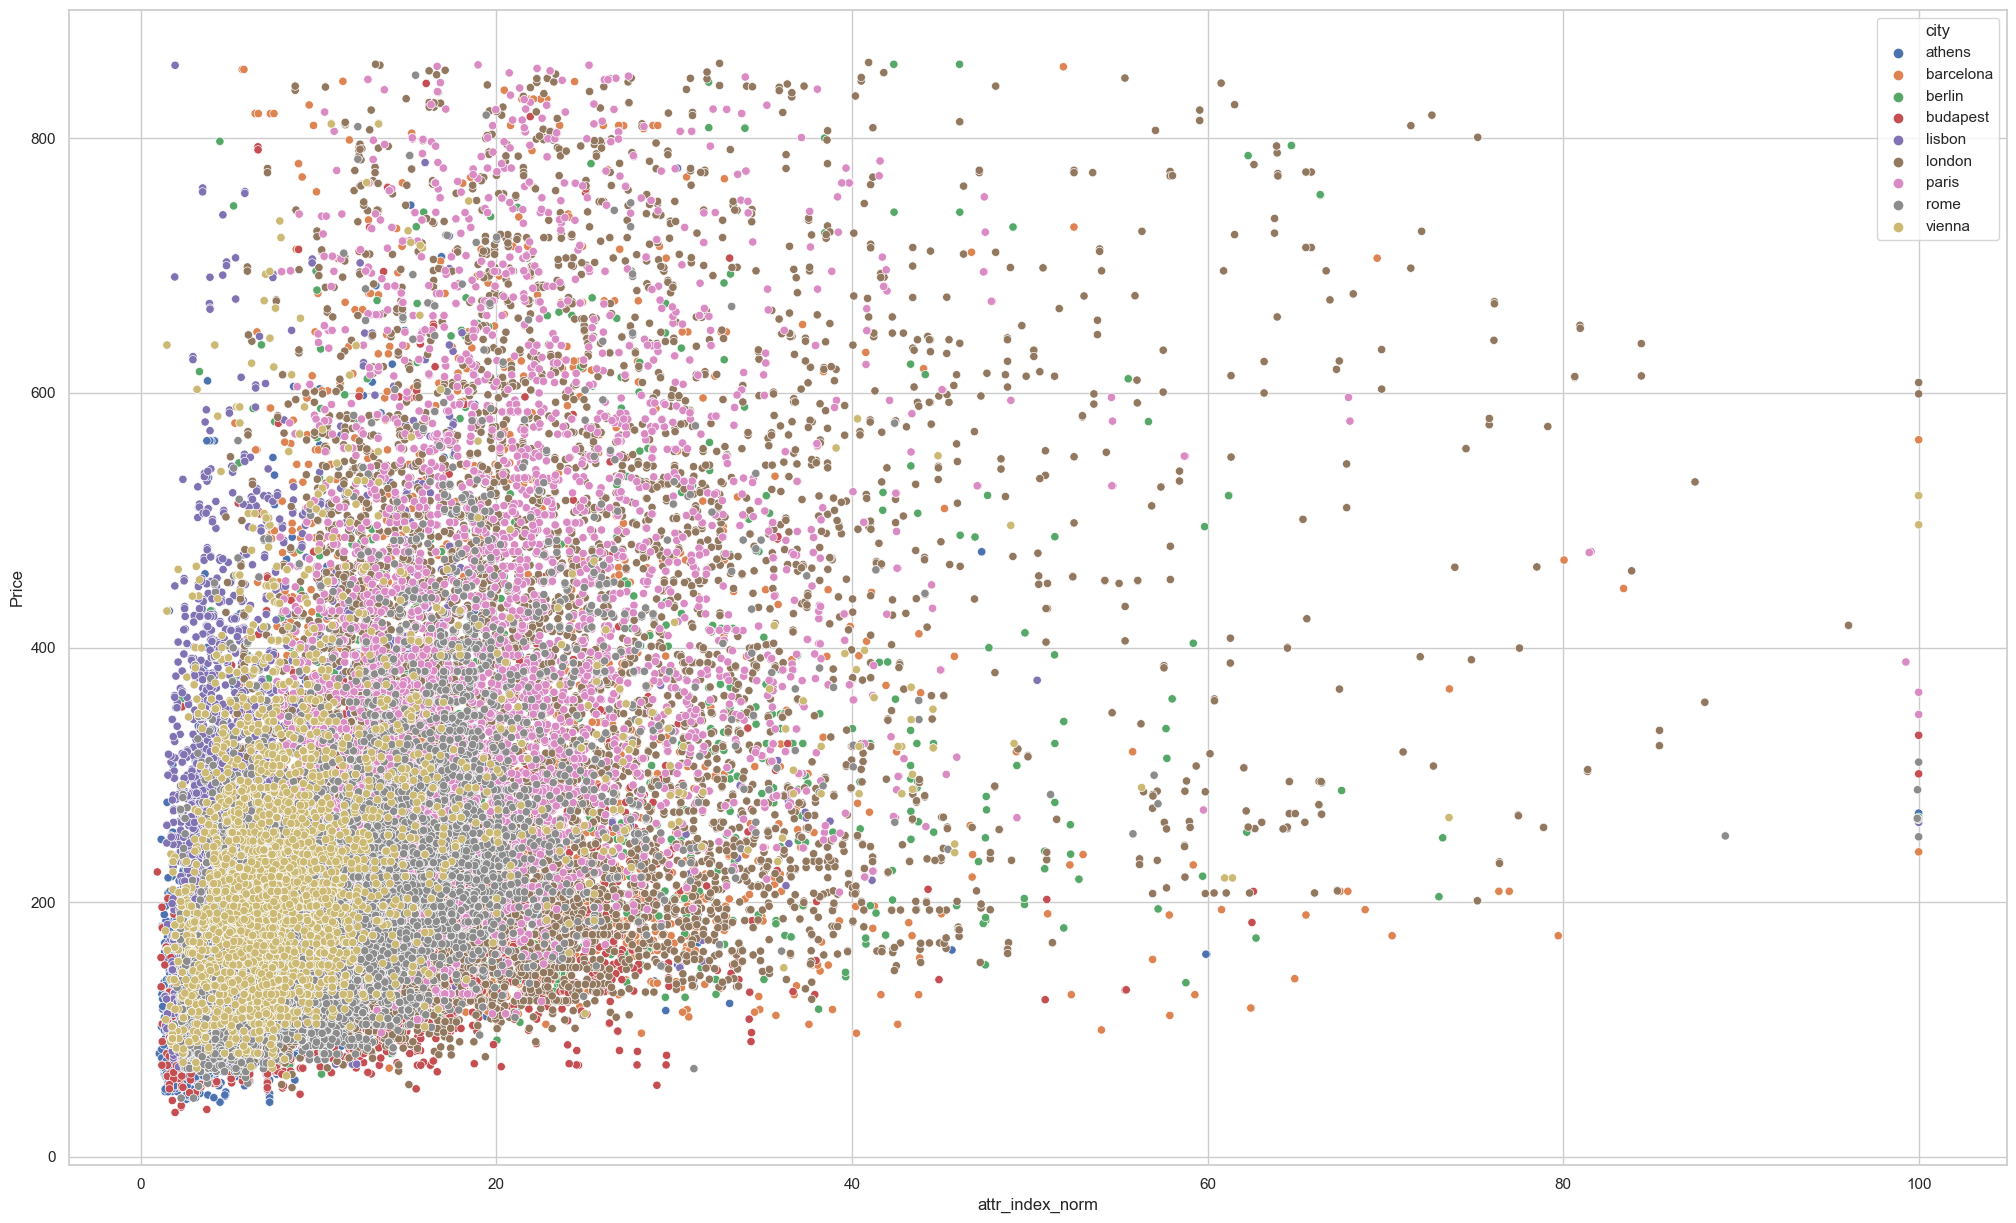

In [212]:
# There exists a very, very rough (but almost non-existent) relationship between attraction index norm vs price
sns.scatterplot(data=eurobnb_no, x='attr_index_norm', y='Price', hue='city')

<AxesSubplot:xlabel='Rest Index Norm', ylabel='Price'>

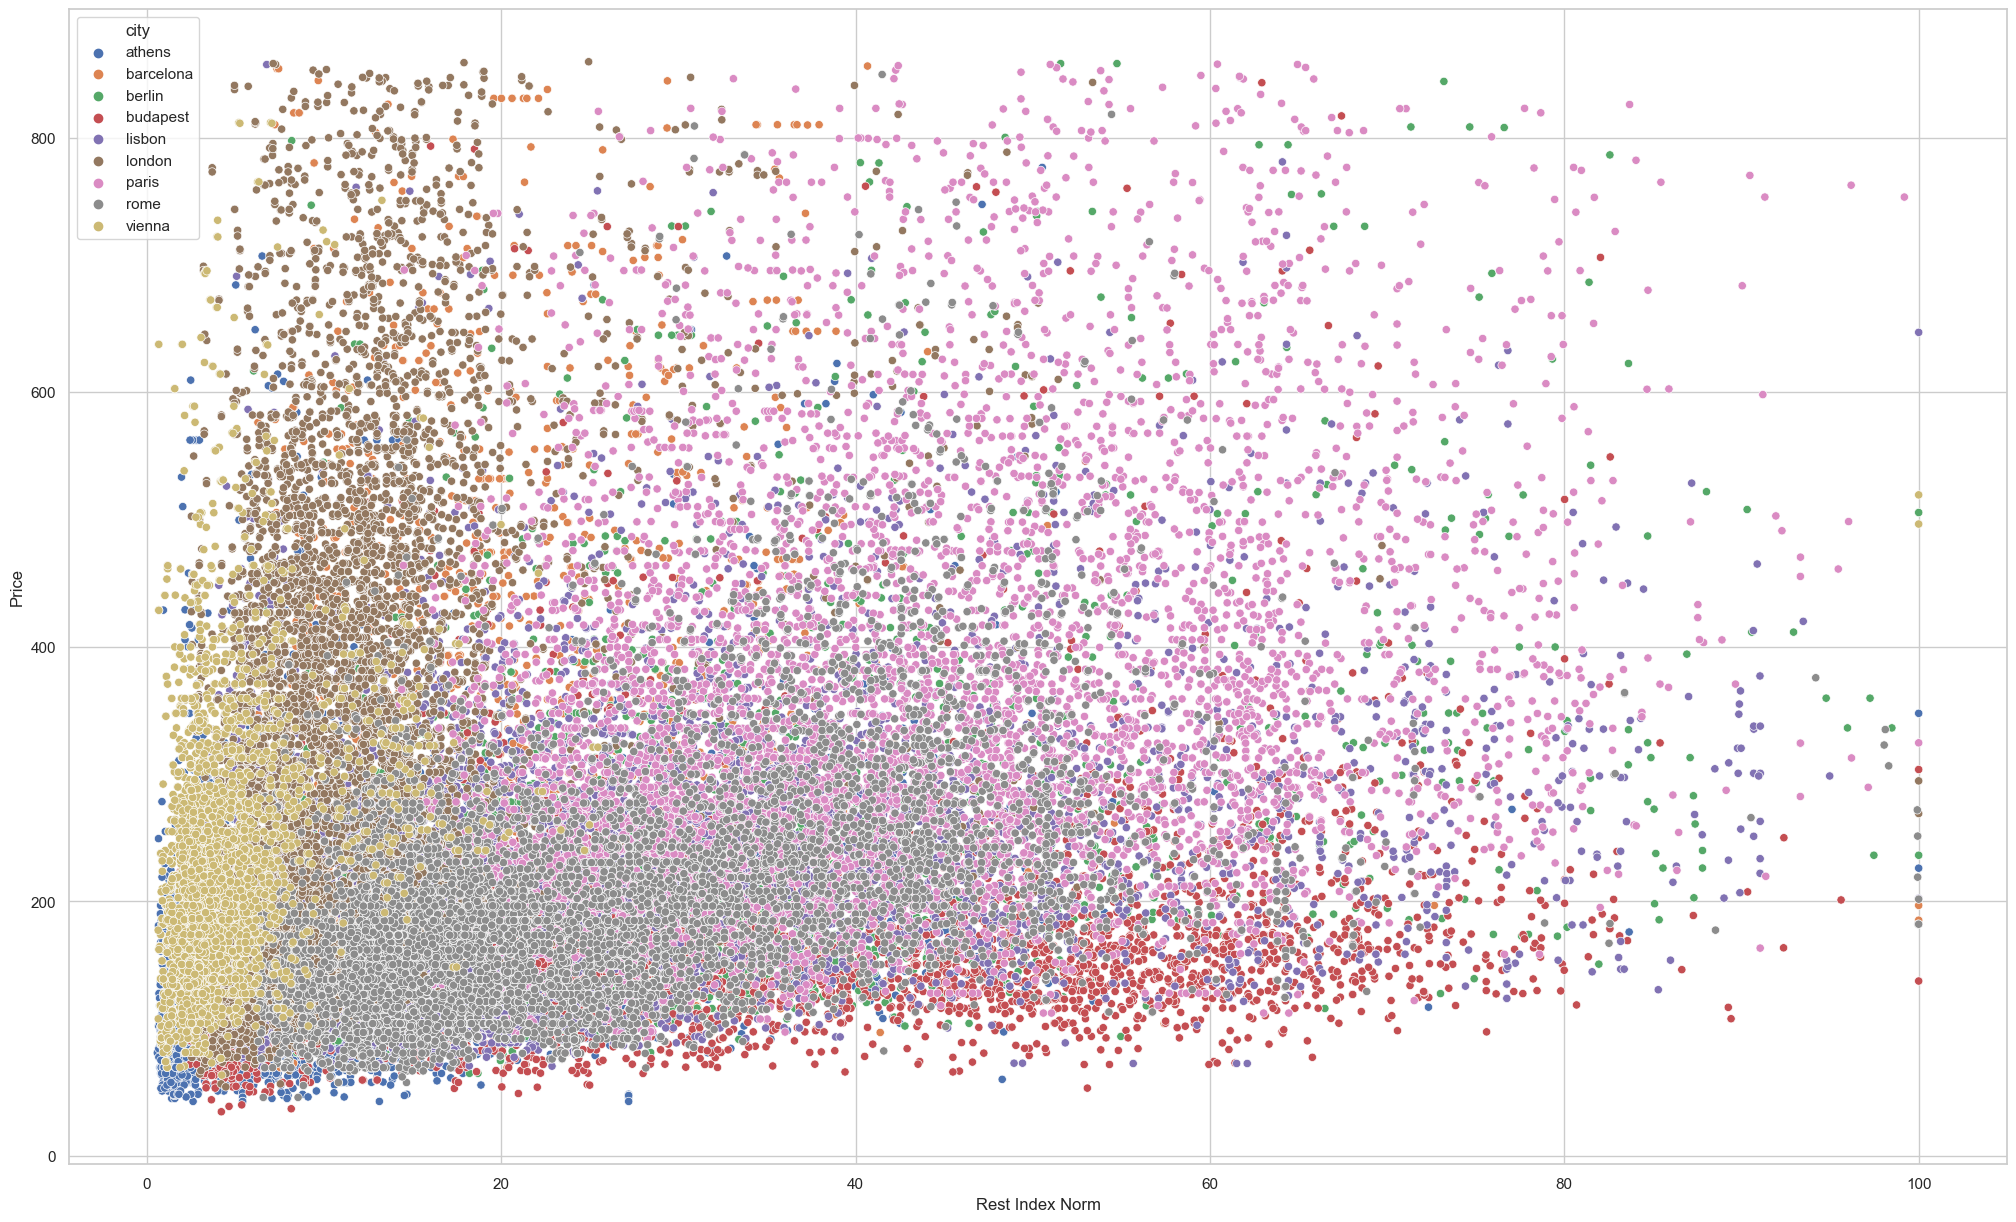

In [214]:
# There exists a very, very rough (but almost none-existent) relationship between Rest Index Norm and Price
sns.scatterplot(data=eurobnb_no, x='Rest Index Norm', y='Price', hue='city')

<AxesSubplot:xlabel='dist', ylabel='Price'>

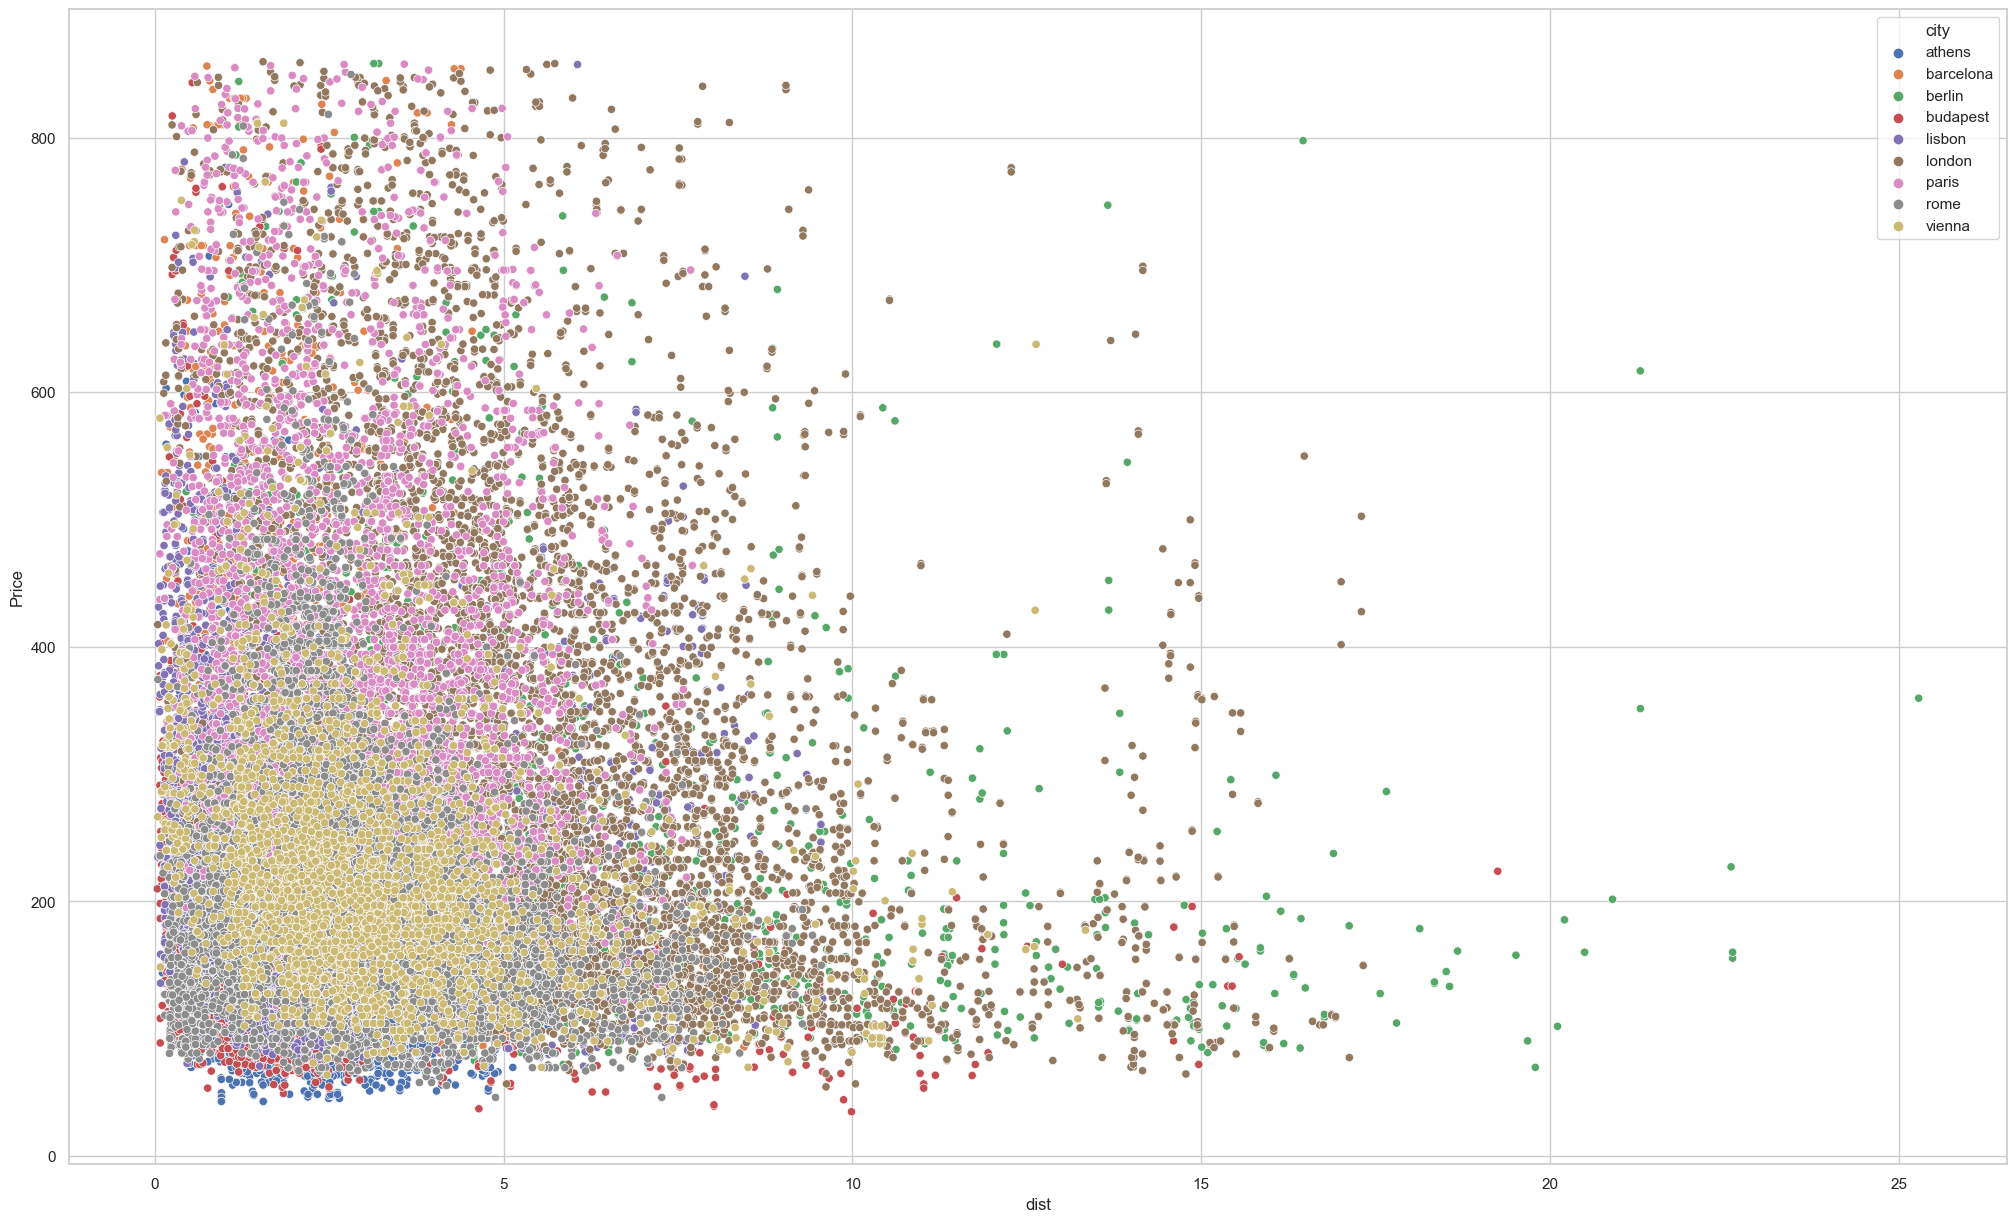

In [220]:
# Rough, nearly non-existent correlation between price vs dist 
sns.scatterplot(data=eurobnb_no, x='dist', y='Price', hue='city')


In [219]:
# Based on the above plots and relationships, most of these features do not seem to possess a high correlation vs price (although I'm aware there are more variables to plot)
# I don't have high hopes for the predictive engine that arises from this case study

<AxesSubplot:>

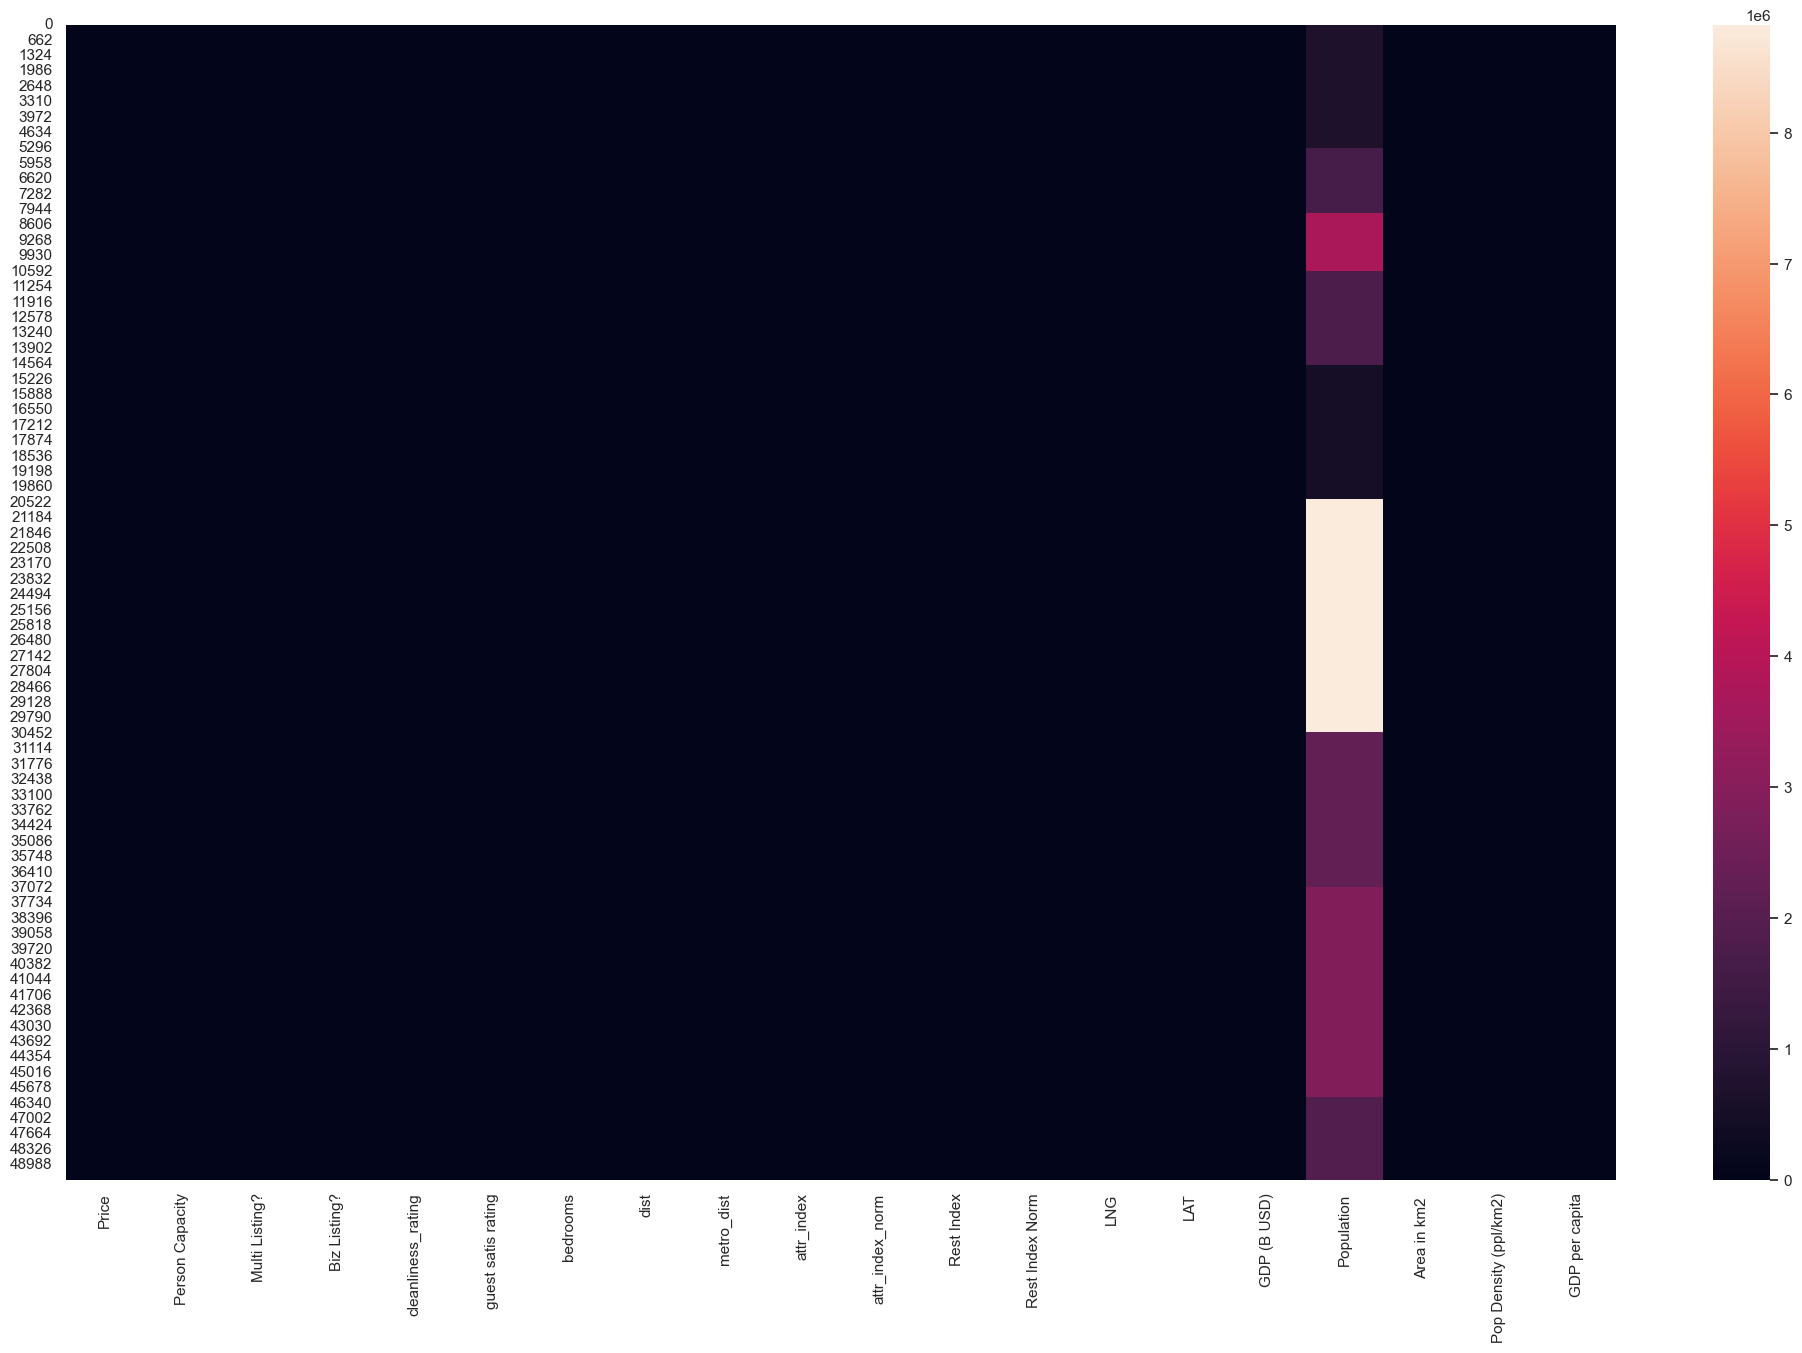

In [222]:
# Instead of plotting more variables to see how they correlate with price, let's produce a correlation matrix/heatmap
# But in order to perform this function, let's remove the categorical variables and include only numeric features (which we did above)


sns.heatmap(data=eurobnb[euro_num_cols])

In [196]:
eurobnb[euro_num_cols].corr

<bound method DataFrame.corr of             Price  Person Capacity  Multi Listing?  Biz Listing?  \
0      129.824479              4.0               0             0   
1      138.963748              4.0               1             0   
2      156.304923              3.0               0             1   
3       91.627024              4.0               1             0   
4       74.051508              2.0               0             0   
...           ...              ...             ...           ...   
49622  715.938574              6.0               0             1   
49623  304.793960              2.0               0             0   
49624  637.168969              2.0               0             0   
49625  301.054157              2.0               0             0   
49626  133.230489              4.0               1             0   

       cleanliness_rating  guest satis rating  bedrooms      dist  metro_dist  \
0                    10.0               100.0         2  2.813964    0

NOTE:

I need assistance plotting the correlations and heatmap
